__Name:__ Mr Chris Nkem-Ike __<span style="padding-left: 135px;">Module:</span>__ 6CS031/UM1 - Cyber Threat Intelligence __<span style="padding-left: 135px;">Student Number:</span>__ 182 4861

# __<center><u><font face="Bold">Task 4: Intrusion Detection Systems (IDS) using ML (combine Lecture 5 and Lecture 6).</font></u></center>__

This workshop may span over multiple weeks (expected two weeks) as appropriate. This task will be an experiment-based research report. Students will be required to perform research, conduct experiments, and write a report. Task will be creating a single report (maximum 1500 words) with the following deliverables.

Students are strongly recommended to read and understand dataset and resources completely as these will used for creating Task 4. Students are advised to structure this report as they wish as long as it presents clearly the information requested:

<ol type="a">
  <li>Create a report on how Machine Learning is used to detect intrusion?</li>
  <li>Provide a critical analysis of IDS survey (minimum 5 relevant academic articles should be considered).</li>
  <li>Develop a methodology on the given topic.</li>
  <li>Conduct the experiments and discuss the results: you are expected to experiment with ML methods/algorithms on KDD Cup data to develop IDS.</li>
  <li>Provide references (not counted in word limit).</li>
</ol>

__Dataset:__ [KDD Cup 1999 Data](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)

Structure for IDS report is provided. Please see document ‘Recommended report structure for IDS’.

__Reference:__ Daniel Barbard, et al. (2001) ADAM: a testbed for exploring the use of data mining in intrusion detection

__Weight:__ 20%

---

# __<center><u><font face="Bold" color="blue">Workshop 05 - Machine Learning for IDS (Intrusion Detection System)</font></u></center>__

__This workshop is a part of Task 4 - 'Intrusion Detection System using Machine Learning' of the assessment.__ This is an experimental-based approach to develop IDS and expand your understanding on applying ML methods for it's effective detection. __Please note that Task 4 is based on Intrusion Detection System NOT Prevention.__

This notebook demonstrates how an IDS using a supervised ML method can be developed. It also introduces you to feature relevance/importance. You are allowed to consider it as a bases to expand and conduct your experiments on IDS. It is important that you reflect research underpinning IDS through the experimental evaluation. However, it is possible that your approach to develop IDS using ML differ completely/partially from this guide. This is highly encouraged and acceptable. You may have your own ideas inspired from the research undertaken which you may like to investigate, implement and evaluate.

__HINT:__ It is expected that you demonstrate your understanding on data pre-processing and analysis, feature engineering, comparing 3 to 5 ML approaches and evaluation. This notebook uses only supervised approach,you may like to experiment with unsupervised approach. The proposed methodology and experiments should be based on the critical analysis of the research conducted and presented in the report.

This notebook contains the code to generate your personalised dataset. You are required to generate your personalised dataset and work on the generated dataset for this task. Please note that failing to use personalised dataset will result in zero marks for this work.

__Dataset:__ [KDD Cup 1999 Data](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)

- Click on the above link and download kddcup.data_10_percent.gz
- Unzip the downloaded folder and save the file as csv
- You will need to insert top row to assign feature names. Feature names are provided at 'kddcup.names'.
- kddcup.names:
  - first line lists the possible types of attacks, which is the last columns in the data file. You can provide a proper name to the last column such as 'connection'.
  - from the next line, list of features is provided. Add these to the respective column starting from first column in the data file.
- Read Abstract and task description sections including links carefully to get a good understanding of the task and the dataset.

Dr. Vinita Nahar, 6CS031 2022-23, University of Wolverhampton, UK

---

In [470]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<br>

Reading and data transformation.

In [471]:
downloaded_dataset = pd.read_csv("KDDCup Data 10 Percent.csv", header=None)

print("First 10 Elements from the 'Dataset - KDDCup Data 10 Percent.csv':")
downloaded_dataset.head(10)

First 10 Elements from the 'Dataset - KDDCup Data 10 Percent.csv':


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


In [472]:
print("Last 10 Elements from the 'Dataset - KDDCup Data 10 Percent.csv':")
downloaded_dataset.tail(10)

Last 10 Elements from the 'Dataset - KDDCup Data 10 Percent.csv':


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
494011,0,tcp,http,SF,308,662,0,0,0,0,...,255,1.0,0.0,0.03,0.06,0.00,0.01,0.0,0.0,normal.
494012,0,tcp,http,SF,291,1862,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494013,0,tcp,http,SF,289,244,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494014,0,tcp,http,SF,306,662,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494015,0,tcp,http,SF,289,1862,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.
494020,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.


In [473]:
with open("kddcup.txt", 'r') as kddcup:  # A handle for reading the contents in the File: kddcup.txt
    # Opening the contents from the file, in order to be manipulated...
    kddcup_contents = kddcup.read()
    # I have customed/manipulated the data entry here, by slicing
    data = kddcup_contents[182:].strip("\n")
    # the contents from the starting position of 182; because I only want the column names for the Dataset:
    # KDDCup Data 10 Percent.csv

# Now we can itereate the contents from the Dataset: KDDCup Data 10
data_scrapping = data.split("\n")
# Percent.csv, and store them in the empty List Variable: stored_features.

# for contents in data_scrapping:
#     # print(contents)   # Un-Comment this to view the contents stored in the List Variable:
# stored_features...
# -------------------------------------------------- NOTE -------------------------------------------------- #
# So we know the contents in the List Variable: data_scrapping, is an element of a Dictionary type.
#
# List Variable: extracted_data - By observance, we know that each Key is the Column Name, and each Value is
#                                 its corresponding connection.This allows us to seperate both values, so each
#                                 elements are seperated as its singular value.
#
# List Variable: extracted_features - Stores the data entry which will be used for the Dataset: KDDCup Data 10
#                                     Percent.csv Column Names
#
# List Variable: extracted_connections - Stores the data entry which will be used for the Dataset: KDDCup Data
#                                        10 Percent.csv connection type.
extracted_data = [
    word for lists_data in data_scrapping for word in lists_data.split(": ")]
extracted_features = [contents for i,
                      contents in enumerate(extracted_data) if i % 2 == 0]
extracted_connections = [contents for i,
                         contents in enumerate(extracted_data) if i % 2 != 0]

extracted_features.append("connection")

print("Extracted Features:   ", extracted_features)     # Displays Column Name
# Displays Connection Type
print("Extracted Connections:", extracted_connections)

Extracted Features:    ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'connection']
Extracted Connections: ['continuous.', 'symbolic.', 'symbolic.', 'symbolic.', 'continuous.', 'continuous.', 'symbolic.', 'continuous.', 'continuous.', 'continuous.', 'continuous.', 'symbolic.', 'continuous.', 'continuous.', 'continuou

In [474]:
# This will put the column names in sequence of the List Variable: extracted_features:
downloaded_dataset.columns = extracted_features

# Saved in local directory:
downloaded_dataset.to_csv("KDDCup Data 10 Percent (Edited).csv")

# This becomes the dataset for current use:
edited_dataset = pd.read_csv("KDDCup Data 10 Percent (Edited).csv")

In [475]:
# NOTE: This line of code is used for debugging. When we print the head of the dataset here, we get a new 
# dataset.head()  # Column: Unnamed: 0...

# So the column is dropped in this line of code:
dropped_feature = edited_dataset.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [476]:
print("First 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
edited_dataset.head(10)

First 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


In [477]:
print("Last 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
edited_dataset.tail(10)

Last 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
494011,0,tcp,http,SF,308,662,0,0,0,0,...,255,1.0,0.0,0.03,0.06,0.00,0.01,0.0,0.0,normal.
494012,0,tcp,http,SF,291,1862,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494013,0,tcp,http,SF,289,244,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494014,0,tcp,http,SF,306,662,0,0,0,0,...,255,1.0,0.0,0.02,0.05,0.00,0.01,0.0,0.0,normal.
494015,0,tcp,http,SF,289,1862,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.
494020,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.


<br>

The code below will list out all the column names.

In [478]:
print(edited_dataset.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'connection'],
      dtype='object')


In [479]:
edited_dataset["connection"].value_counts()

connection
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

<br>

The cell abolve displays counts of each type of connections.

Let's store all the records in a dataframe ___normal___ where connection is 'normal'.

In [480]:
# replace nan with 0
edited_dataset = edited_dataset.replace(np.nan, 0)

In [481]:
normal = edited_dataset[(edited_dataset.connection == "smurf.") | (edited_dataset.connection == "satan.") | (edited_dataset.connection == "neptune. ")]
normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
7793,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,3,0.02,0.02,0.02,0.0,0.0,0.0,0.0,0.0,smurf.
7794,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,13,0.08,0.02,0.08,0.0,0.0,0.0,0.0,0.0,smurf.
7795,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,23,0.14,0.02,0.14,0.0,0.0,0.0,0.0,0.0,smurf.
7796,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,33,0.19,0.02,0.19,0.0,0.0,0.0,0.0,0.0,smurf.
7797,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,43,0.23,0.02,0.23,0.0,0.0,0.0,0.0,0.0,smurf.


In [482]:
normal_rows = normal.shape[0]
normal_columns = normal.shape[1]
edited_dataset_rows = edited_dataset.shape[0]
edited_dataset_columns = edited_dataset.shape[1]

print("The 'Element - normal' from the 'Dataset - KDDCup Data 10 Percent.csv' has "\
      f"{normal_rows:,} rows and {normal_columns} columns." + "\n" + 
      "The 'Element - normal' from the 'Dataset - KDDCup Data 10 Percent (Edited).csv' has "\
      f"{edited_dataset_rows:,} rows and {edited_dataset_columns} columns.")

The 'Element - normal' from the 'Dataset - KDDCup Data 10 Percent.csv' has 282,379 rows and 42 columns.
The 'Element - normal' from the 'Dataset - KDDCup Data 10 Percent (Edited).csv' has 494,021 rows and 42 columns.


<br>

___Prepare your personalised dataset for this task. Replace '26577' with the last 5 digits of your student number. If it starts with zero, please use 6 as the first digit.___

Save the data in to a csv file using the codes in the cells below.

In [483]:
rows = np.random.choice(edited_dataset.index.values, 24861)
dataset = edited_dataset.loc[rows]

dataset.to_csv("ChrisNkemIke_24861.csv", index=False)

Replace name and number with your name and student number. Write it to a csv file. You are required to use this dataset to complete this task.

<br>

In [484]:
workshop_dataset = pd.read_csv("ChrisNkemIke_24861.csv")

print("First 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
workshop_dataset[:10]

First 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
3,0,tcp,http,SF,191,1958,0,0,0,0,...,255,1.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,normal.
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
5,0,tcp,http,REJ,0,0,0,0,0,0,...,31,1.00,0.00,1.0,0.19,0.0,0.0,1.0,1.0,normal.
6,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
7,0,tcp,private,S0,0,0,0,0,0,0,...,14,0.05,0.07,0.0,0.00,1.0,1.0,0.0,0.0,neptune.
8,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
9,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.


In [485]:
print("Last 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
workshop_dataset[-10:]

Last 10 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
24851,0,tcp,http,SF,144,193,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.0,normal.
24852,0,tcp,smtp,SF,1277,330,0,0,0,0,...,92,0.49,0.04,0.01,0.00,0.00,0.00,0.0,0.0,normal.
24853,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,smurf.
24854,0,tcp,private,S0,0,0,0,0,0,0,...,3,0.01,0.07,0.00,0.00,1.00,1.00,0.0,0.0,neptune.
24855,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,smurf.
24856,0,tcp,http,SF,298,410,0,0,0,0,...,255,1.00,0.00,0.08,0.04,0.00,0.02,0.0,0.0,normal.
24857,0,tcp,private,S0,0,0,0,0,0,0,...,21,0.08,0.05,0.00,0.00,1.00,1.00,0.0,0.0,neptune.
24858,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,smurf.
24859,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.0,neptune.
24860,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,smurf.


In [486]:
workshop_dataset["connection"].value_counts()

connection
smurf.              14204
neptune.             5461
normal.              4768
back.                 115
satan.                 73
ipsweep.               70
warezclient.           65
portsweep.             43
teardrop.              39
pod.                   12
nmap.                   8
rootkit.                1
buffer_overflow.        1
guess_passwd.           1
Name: count, dtype: int64

__(Q):__ You will note different counts of the connection. Can you guess why? Write your obesrvation in a Markdown cell below.

__(A):__ From the output above, there are 15 different/unique values in the `Column: connection`. These are unique values, since each value has a different unique count of itself in the `Column: connection`.

<br>

In [487]:
print("First 5 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
workshop_dataset.head()

First 5 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
3,0,tcp,http,SF,191,1958,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [488]:
workshop_dataset.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

We can note that there are different data types including int, float and object. Object is used to store string values. We would like to transform string to numeric values so that we can apply machine learning methods using sklearn machine learning library. We are going to use sklearn for data preprocessing and machine learning functions.

<br>

In [489]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

<br>

Let's select all the columns of 'object' types to encode them into numeric values from string. We'll be using LabelEncoder() for encoding.

In [490]:
obj_cols = edited_dataset.select_dtypes(include=["object"]).columns

print(obj_cols)

Index(['protocol_type', 'service', 'flag', 'connection'], dtype='object')


In [491]:
le = LabelEncoder()

for i in obj_cols:
    workshop_dataset[i] = le.fit_transform(workshop_dataset[i])

workshop_dataset.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

__(Q):__ What difference you can observe? Write your observation in a new Markdown cell below.

__(A):__ Label Enconder is applied on the column, to transform categorical values (which were listed as `object`, from the above cell), to numerical values. In order to overcome errors in mathematical computations exhibited by most of our algorithms, we implemented a pre-processing step involving the use of the label encoder. This essential technique allowed us to encode the columns, assigning a distinct integer to each unique value within the dataset. By employing the label encoder, we ensured consistent and accurate processing of categorical data. This transformation enabled our algorithms to handle the data effectively, paving the way for improved analytical outcomes and reducing the potential for errors during mathematical computations.

<br>

In [492]:
print("First 5 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
workshop_dataset.head()

First 5 Elements from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,0,13,7,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11
1,0,0,13,7,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11
2,0,0,13,7,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11
3,0,1,21,7,191,1958,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,0,0,13,7,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11


In [493]:
# Drop the last column 'connection'.
columns = list(workshop_dataset)
columns = columns[:-1]

print("Below is a list of all columns from the 'Dataset - ChrisNkemIke_24861.csv', excluding the "\
"'Column - connection':")
columns

Below is a list of all columns from the 'Dataset - ChrisNkemIke_24861.csv', excluding the 'Column - connection':


['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

<br>

Scaling the input data to have zero mean and unit variance. This step is used to standardised the dataset.

In [494]:
standard_scaler = StandardScaler()
sc_data = standard_scaler.fit_transform(workshop_dataset[columns])

print(sc_data)

[[-0.0653293  -0.80676261 -0.69424516 ... -0.47162531 -0.24402606
  -0.24134856]
 [-0.0653293  -0.80676261 -0.69424516 ... -0.47162531 -0.24402606
  -0.24134856]
 [-0.0653293  -0.80676261 -0.69424516 ... -0.47162531 -0.24402606
  -0.24134856]
 ...
 [-0.0653293  -0.80676261 -0.69424516 ... -0.47162531 -0.24402606
  -0.24134856]
 [-0.0653293   0.9371662   1.59899706 ...  2.12323919 -0.24402606
  -0.24134856]
 [-0.0653293  -0.80676261 -0.69424516 ... -0.47162531 -0.24402606
  -0.24134856]]


Resultant scaled data (sc_data) is in the form of ndimenssional array. Let's fit it back to the dataframe.

<br>

In [495]:
transformed_workshop_dataset = pd.DataFrame(sc_data, columns=columns)

transformed_workshop_dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.065329,-0.806763,-0.694245,0.499467,-0.015310,-0.025931,0.0,-0.042981,0.0,-0.044435,...,0.339992,0.626325,0.598872,-0.283128,0.822640,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349
1,-0.065329,-0.806763,-0.694245,0.499467,-0.015310,-0.025931,0.0,-0.042981,0.0,-0.044435,...,0.339992,0.626325,0.598872,-0.283128,0.822640,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349
2,-0.065329,-0.806763,-0.694245,0.499467,-0.015310,-0.025931,0.0,-0.042981,0.0,-0.044435,...,0.339992,0.626325,0.598872,-0.283128,0.822640,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349
3,-0.065329,0.937166,-0.082714,0.499467,-0.026261,0.025524,0.0,-0.042981,0.0,-0.044435,...,0.339992,0.626325,0.598872,-0.283128,-1.256125,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349
4,-0.065329,-0.806763,-0.694245,0.499467,-0.015310,-0.025931,0.0,-0.042981,0.0,-0.044435,...,0.339992,0.626325,0.598872,-0.283128,0.822640,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349


In [496]:
full_workshop_dataset = pd.DataFrame(transformed_workshop_dataset)

full_workshop_dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.065329,-0.806763,-0.694245,0.499467,-0.015310,-0.025931,0.0,-0.042981,0.0,-0.044435,...,0.339992,0.626325,0.598872,-0.283128,0.822640,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349
1,-0.065329,-0.806763,-0.694245,0.499467,-0.015310,-0.025931,0.0,-0.042981,0.0,-0.044435,...,0.339992,0.626325,0.598872,-0.283128,0.822640,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349
2,-0.065329,-0.806763,-0.694245,0.499467,-0.015310,-0.025931,0.0,-0.042981,0.0,-0.044435,...,0.339992,0.626325,0.598872,-0.283128,0.822640,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349
3,-0.065329,0.937166,-0.082714,0.499467,-0.026261,0.025524,0.0,-0.042981,0.0,-0.044435,...,0.339992,0.626325,0.598872,-0.283128,-1.256125,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349
4,-0.065329,-0.806763,-0.694245,0.499467,-0.015310,-0.025931,0.0,-0.042981,0.0,-0.044435,...,0.339992,0.626325,0.598872,-0.283128,0.822640,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24856,-0.065329,0.937166,-0.082714,0.499467,-0.024868,-0.015156,0.0,-0.042981,0.0,-0.044435,...,-3.465028,0.626325,0.598872,-0.283128,-1.089824,0.723831,-0.472703,-0.419728,-0.244026,-0.241349
24857,-0.065329,0.937166,1.598997,-1.129311,-0.028748,-0.025931,0.0,-0.042981,0.0,-0.044435,...,0.339992,-1.579012,-1.640661,0.193507,-1.256125,-0.152336,2.124722,2.123239,-0.244026,-0.241349
24858,-0.065329,-0.806763,-0.694245,0.499467,-0.015310,-0.025931,0.0,-0.042981,0.0,-0.044435,...,0.339992,0.626325,0.598872,-0.283128,0.822640,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349
24859,-0.065329,0.937166,1.598997,-1.129311,-0.028748,-0.025931,0.0,-0.042981,0.0,-0.044435,...,0.339992,-1.654408,-1.713689,0.288833,-1.256125,-0.152336,2.124722,2.123239,-0.244026,-0.241349


In [497]:
full_workshop_dataset["connection"] = workshop_dataset["connection"]

full_workshop_dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,-0.065329,-0.806763,-0.694245,0.499467,-0.015310,-0.025931,0.0,-0.042981,0.0,-0.044435,...,0.626325,0.598872,-0.283128,0.822640,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349,11
1,-0.065329,-0.806763,-0.694245,0.499467,-0.015310,-0.025931,0.0,-0.042981,0.0,-0.044435,...,0.626325,0.598872,-0.283128,0.822640,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349,11
2,-0.065329,-0.806763,-0.694245,0.499467,-0.015310,-0.025931,0.0,-0.042981,0.0,-0.044435,...,0.626325,0.598872,-0.283128,0.822640,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349,11
3,-0.065329,0.937166,-0.082714,0.499467,-0.026261,0.025524,0.0,-0.042981,0.0,-0.044435,...,0.626325,0.598872,-0.283128,-1.256125,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349,6
4,-0.065329,-0.806763,-0.694245,0.499467,-0.015310,-0.025931,0.0,-0.042981,0.0,-0.044435,...,0.626325,0.598872,-0.283128,0.822640,-0.152336,-0.472703,-0.471625,-0.244026,-0.241349,11


In [498]:
workshop_target = workshop_dataset["connection"]

workshop_target.head(10)

0    11
1    11
2    11
3     6
4    11
5     6
6    11
7     4
8    11
9    11
Name: connection, dtype: int64

In [499]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report, 
    confusion_matrix
)

In [500]:
features_train, features_test, labels_train, labels_test = train_test_split(
    transformed_workshop_dataset, workshop_target, test_size=.3, random_state=8
)

print(f"Features Train has {features_train.shape[0]:,} rows and {features_train.shape[1]} columns." + "\n" + 
      f"Features Test has {features_test.shape[0]:,} rows and {features_test.shape[1]} columns.")

Features Train has 17,402 rows and 41 columns.
Features Test has 7,459 rows and 41 columns.


In [501]:
from sklearn.ensemble import RandomForestClassifier

For more information on Random Forest, please refer to:
[sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

<br>

In [502]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(features_train, labels_train)

print("Mean Accuracy: {score:}%".format(score=(rfc.score(features_test, labels_test)) * 100))

Mean Accuracy: 99.9597801313849%


In [503]:
feature_importance = pd.DataFrame(
    rfc.feature_importances_, index=features_train.columns, 
    columns=["importance"]).sort_values("importance", ascending=False
)
updated_feature_importance = feature_importance.drop([feature_importance.index[0]])

updated_feature_importance

,importance
protocol_type,1.115715e-01
count,1.102622e-01
service,1.053881e-01
same_srv_rate,8.032502e-02
src_bytes,7.858622e-02
dst_host_same_src_port_rate,6.953732e-02
diff_srv_rate,6.595557e-02
flag,4.641364e-02
dst_bytes,4.067191e-02
dst_host_same_srv_rate,2.941268e-02


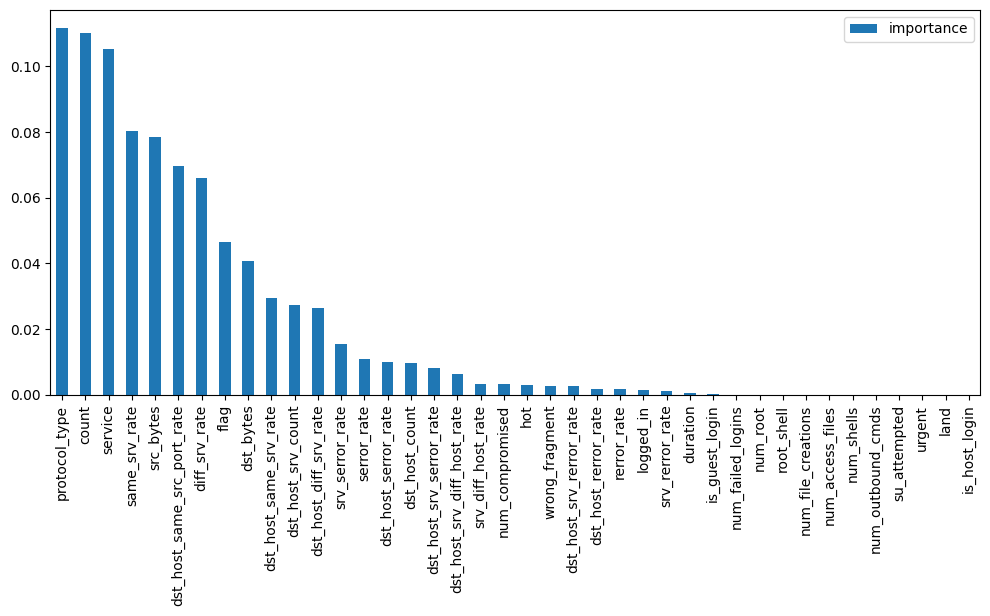

In [504]:
# Plot feature_importance in a bar graph:
plt.rcParams["figure.figsize"] = (12, 5)

updated_feature_importance.plot.bar();

If the bar graph shows 'connection', ignore it as 'connection' is a target NOT a feature; and we are only interested in inspecting feature importance.

<br>

In [505]:
pred = rfc_model.predict(features_test)
matrix_rfc = confusion_matrix(labels_test, pred)

print("Model:", rfc_model)

print("\n" + "Confusion Matrix for RandomForestClassifier:" + "\n")
print(matrix_rfc)
print('-' * 77)

print("Classification Report for RandomForestClassifier:" + "\n")
print(classification_report(labels_test, pred))

Model: RandomForestClassifier()

Confusion Matrix for RandomForestClassifier:

[[  38    0    0    0    0    0    0    0    0    0    0]
 [   0   21    0    0    0    0    0    0    0    0    0]
 [   0    0 1671    0    0    0    0    0    0    0    0]
 [   0    2    0    1    0    0    0    0    0    0    0]
 [   0    0    0    0 1426    0    0    0    0    0    0]
 [   0    0    0    0    0    3    0    0    0    0    0]
 [   0    0    0    0    0    0   16    0    0    0    0]
 [   0    0    0    0    0    0    0   15    0    0    0]
 [   0    0    0    0    0    0    0    0 4239    0    0]
 [   0    0    0    0    0    0    0    0    0    7    0]
 [   0    0    0    0    1    0    0    0    0    0   19]]
-----------------------------------------------------------------------------
Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           3       0.91      1.00      0.95 

<br>

Feature importance using RFE (Recursive Feature Elimination). For more information, visit [sklearn.feature_selection.RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

In [506]:
from sklearn.feature_selection import RFE
import itertools


# Select top-15 features using RFE model:
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(features_train, labels_train)

print(rfe.get_support())

[False  True  True  True  True  True False False False False False False
 False False False False False False False False False False  True  True
 False False False False  True  True False False  True  True  True  True
  True False  True False False]


In [507]:
# Listing the selected top-k features:
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), features_train.columns)]
selected_features = [v for i, v in feature_map if i == True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_serror_rate']

RFE is used to select top-k best features. You may like to use it as feature selection for building different classifiers.

End of the Workshop.

---
<br>
<br>

## __<center><u>Assessment: Experimentations (using Machine Learning)</u></center>__

In [508]:
import seaborn as sns
import tensorflow as tf

from matplotlib import style
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (GRU, Dense, Conv1D, Flatten, MaxPooling1D)

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier)

In [509]:
my_df = pd.read_csv("KDDCup Data 10 Percent (Edited).csv")

print("Features from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
my_df  # The "Column - Unnamed: 0" is not required in the dataset, it is a copy of the index column.

Features from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,0,tcp,http,SF,181,5450,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,1,0,tcp,http,SF,239,486,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,2,0,tcp,http,SF,235,1337,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,3,0,tcp,http,SF,219,1337,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,4,0,tcp,http,SF,217,2032,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,494016,0,tcp,http,SF,310,1881,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,494017,0,tcp,http,SF,282,2286,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,494018,0,tcp,http,SF,203,1200,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,494019,0,tcp,http,SF,291,1200,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [510]:
# So the "Column - Unnamed: 0" is dropped in this line of code:
drop_feature = my_df.drop(columns="Unnamed: 0", axis=1, inplace=True)

print("Features from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
my_df

Features from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [511]:
print("Below are the lists of columns from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
print('-' * 93)

for i, column in enumerate(my_df.columns):
    print("|Column {num:02}|: {column}".format(num=(i + 1), column=column))

Below are the lists of columns from the 'Dataset - KDDCup Data 10 Percent (Edited).csv':
---------------------------------------------------------------------------------------------
|Column 01|: duration
|Column 02|: protocol_type
|Column 03|: service
|Column 04|: flag
|Column 05|: src_bytes
|Column 06|: dst_bytes
|Column 07|: land
|Column 08|: wrong_fragment
|Column 09|: urgent
|Column 10|: hot
|Column 11|: num_failed_logins
|Column 12|: logged_in
|Column 13|: num_compromised
|Column 14|: root_shell
|Column 15|: su_attempted
|Column 16|: num_root
|Column 17|: num_file_creations
|Column 18|: num_shells
|Column 19|: num_access_files
|Column 20|: num_outbound_cmds
|Column 21|: is_host_login
|Column 22|: is_guest_login
|Column 23|: count
|Column 24|: srv_count
|Column 25|: serror_rate
|Column 26|: srv_serror_rate
|Column 27|: rerror_rate
|Column 28|: srv_rerror_rate
|Column 29|: same_srv_rate
|Column 30|: diff_srv_rate
|Column 31|: srv_diff_host_rate
|Column 32|: dst_host_count
|Column 3

In [512]:
print("The information below, displays the unique counts for each type of connection:")
print('-' * 83)
my_df.connection.value_counts()

The information below, displays the unique counts for each type of connection:
-----------------------------------------------------------------------------------


connection
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

<br>

In the cell below, I am creating a personal/unique dataset from 5 unique types of `connection` in the __'Dataset - KDDCup Data 10 Percent (Edited).csv'__:
- smurf.
- neptune.
- satan.
- ipsweep.
- teardrop.

In [513]:
my_features = my_df[
    (my_df.connection == "neptune.") | (my_df.connection == "smurf.") | (my_df.connection == "satan.")
]

print("Features from my personalised data in the 'Dataset - KDDCup Data 10 Percent (Edited).csv':")
my_features

Features from my personalised data in the 'Dataset - KDDCup Data 10 Percent (Edited).csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
7601,0,tcp,telnet,S0,0,0,0,0,0,0,...,6,1.00,0.00,0.20,0.33,1.0,0.83,0.0,0.0,neptune.
7602,0,tcp,telnet,S0,0,0,0,0,0,0,...,16,1.00,0.00,0.07,0.12,1.0,0.94,0.0,0.0,neptune.
7793,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,3,0.02,0.02,0.02,0.00,0.0,0.00,0.0,0.0,smurf.
7794,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,13,0.08,0.02,0.08,0.00,0.0,0.00,0.0,0.0,smurf.
7795,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,23,0.14,0.02,0.14,0.00,0.0,0.00,0.0,0.0,smurf.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490860,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.00,0.0,0.0,smurf.
490861,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.00,0.0,0.0,smurf.
490862,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.00,0.0,0.0,smurf.
490863,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.00,0.0,0.0,smurf.


In [514]:
my_features_rows = my_features.shape[0]
my_features_columns = my_features.shape[1]
my_df_rows = my_df.shape[0]
my_df_columns = my_df.shape[1]

print(f"From my personalised dataset, in the 'Dataset - KDDCup Data 10 Percent (Edited).csv', we can notice \
that the data contains" + "\n" + f"{my_features_rows:,} rows and {my_features_columns} columns. Whereas from \
the original 'Dataset - KDDCup Data 10 Percent (Edited).csv', we can notice that the " + "\n" + 
f"data contains {my_df_rows:,} rows and {my_df_columns} columns.")

From my personalised dataset, in the 'Dataset - KDDCup Data 10 Percent (Edited).csv', we can notice that the data contains
389,580 rows and 42 columns. Whereas from the original 'Dataset - KDDCup Data 10 Percent (Edited).csv', we can notice that the 
data contains 494,021 rows and 42 columns.


In [515]:
feature_rows = np.random.choice(my_features.index.values, 24861)  # Created dataset in random...
df = my_features.loc[feature_rows]

df.to_csv("ChrisNkemIke_24861.csv", index=False)  # Saved dataset, used for the project.

In [516]:
df = pd.read_csv("ChrisNkemIke_24861.csv")

print("Features in my personalised 'Dataset - ChrisNkemIke_24861.csv':")
df

Features in my personalised 'Dataset - ChrisNkemIke_24861.csv':


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
2,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.06,0.0,0.0,0.0,0.0,1.0,1.0,neptune.
3,0,tcp,private,S0,0,0,0,0,0,0,...,6,0.02,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24856,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
24857,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
24858,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
24859,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [517]:
print("The information below, displays the unique counts of each type of connections, from my " + "\n" + 
      "personlised 'Dataset: Neptune Connection':")
print('-' * 91)
df.connection.value_counts()

The information below, displays the unique counts of each type of connections, from my 
personlised 'Dataset: Neptune Connection':
-------------------------------------------------------------------------------------------


connection
smurf.      17856
neptune.     6909
satan.         96
Name: count, dtype: int64

<br>

## Data Pre-Processing

In [518]:
print("Lists of Data Types from my personalised 'Dataset - ChrisNkemIke_24861.csv':")
df.dtypes

Lists of Data Types from my personalised 'Dataset - ChrisNkemIke_24861.csv':


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [519]:
print(f"My personalised dataset has {df.shape[0]:,} rows and {df.shape[1]} columns.")

My personalised dataset has 24,861 rows and 42 columns.


This is because there are duplicate elements, which will be removed from the cell below. But firstly, I will check for any `null` values, and treat them.

<br>

In [520]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [521]:
df.drop_duplicates(inplace=True)
print(f"My personalised dataset now has {df.shape[0]:,} rows and {df.shape[1]} columns.")

My personalised dataset now has 6,015 rows and 42 columns.


In [522]:
print("The current descriptive statistics, from my personalised 'Dataset - ChrisNkemIke_24861.csv':")
df.describe().T

The current descriptive statistics, from my personalised 'Dataset - ChrisNkemIke_24861.csv':


,count,mean,std,min,25%,50%,75%,max
duration,6015.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
src_bytes,6015.0,15.068495,109.144283,0.0,0.00,0.00,0.00,1032.00
dst_bytes,6015.0,0.000665,0.051575,0.0,0.00,0.00,0.00,4.00
land,6015.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
wrong_fragment,6015.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
urgent,6015.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
hot,6015.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
num_failed_logins,6015.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
logged_in,6015.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
num_compromised,6015.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00


In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6015 entries, 0 to 24854
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     6015 non-null   int64  
 1   protocol_type                6015 non-null   object 
 2   service                      6015 non-null   object 
 3   flag                         6015 non-null   object 
 4   src_bytes                    6015 non-null   int64  
 5   dst_bytes                    6015 non-null   int64  
 6   land                         6015 non-null   int64  
 7   wrong_fragment               6015 non-null   int64  
 8   urgent                       6015 non-null   int64  
 9   hot                          6015 non-null   int64  
 10  num_failed_logins            6015 non-null   int64  
 11  logged_in                    6015 non-null   int64  
 12  num_compromised              6015 non-null   int64  
 13  root_shell            

In [524]:
print("Below are the lists of columns from my personalised dataset:")
print('-' * 63)

for i, column in enumerate(df.columns):
    print("|Column {num:02}|: {column}".format(num=(i + 1), column=column))

Below are the lists of columns from my personalised dataset:
---------------------------------------------------------------
|Column 01|: duration
|Column 02|: protocol_type
|Column 03|: service
|Column 04|: flag
|Column 05|: src_bytes
|Column 06|: dst_bytes
|Column 07|: land
|Column 08|: wrong_fragment
|Column 09|: urgent
|Column 10|: hot
|Column 11|: num_failed_logins
|Column 12|: logged_in
|Column 13|: num_compromised
|Column 14|: root_shell
|Column 15|: su_attempted
|Column 16|: num_root
|Column 17|: num_file_creations
|Column 18|: num_shells
|Column 19|: num_access_files
|Column 20|: num_outbound_cmds
|Column 21|: is_host_login
|Column 22|: is_guest_login
|Column 23|: count
|Column 24|: srv_count
|Column 25|: serror_rate
|Column 26|: srv_serror_rate
|Column 27|: rerror_rate
|Column 28|: srv_rerror_rate
|Column 29|: same_srv_rate
|Column 30|: diff_srv_rate
|Column 31|: srv_diff_host_rate
|Column 32|: dst_host_count
|Column 33|: dst_host_srv_count
|Column 34|: dst_host_same_srv_rate

In [525]:
categorical_columns = df.select_dtypes(include=["object"]).columns

print("Below are the lists of categorical columns from my personalised dataset:")
print('-' * 73)

for i, column in enumerate(categorical_columns):
    print("|{num:02}|: {each_column}".format(num=(i + 1), each_column=column))

Below are the lists of categorical columns from my personalised dataset:
-------------------------------------------------------------------------
|01|: protocol_type
|02|: service
|03|: flag
|04|: connection


In [526]:
for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

df.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [527]:
drop_column = list(df)
drop_connection_column = drop_column[:-1]

print("Below are the lists of columns from my personalised dataset, with the 'Column - connection' dropped:")
print('-' * 103)

for i, column in enumerate(drop_connection_column):
    print("|{num:02}|: {each_column}".format(num=(i + 1), each_column=column))

Below are the lists of columns from my personalised dataset, with the 'Column - connection' dropped:
-------------------------------------------------------------------------------------------------------
|01|: duration
|02|: protocol_type
|03|: service
|04|: flag
|05|: src_bytes
|06|: dst_bytes
|07|: land
|08|: wrong_fragment
|09|: urgent
|10|: hot
|11|: num_failed_logins
|12|: logged_in
|13|: num_compromised
|14|: root_shell
|15|: su_attempted
|16|: num_root
|17|: num_file_creations
|18|: num_shells
|19|: num_access_files
|20|: num_outbound_cmds
|21|: is_host_login
|22|: is_guest_login
|23|: count
|24|: srv_count
|25|: serror_rate
|26|: srv_serror_rate
|27|: rerror_rate
|28|: srv_rerror_rate
|29|: same_srv_rate
|30|: diff_srv_rate
|31|: srv_diff_host_rate
|32|: dst_host_count
|33|: dst_host_srv_count
|34|: dst_host_same_srv_rate
|35|: dst_host_diff_srv_rate
|36|: dst_host_same_src_port_rate
|37|: dst_host_srv_diff_host_rate
|38|: dst_host_serror_rate
|39|: dst_host_srv_serror_rate
|4

In [528]:
applied_standard_scaler = standard_scaler.fit_transform(df[drop_connection_column])

print(applied_standard_scaler)

[[ 0.         -6.57615099 -4.21048318 ... -1.86233882 -0.50516856
  -0.50155812]
 [ 0.         -6.57615099 -4.21048318 ... -1.86233882 -0.50516856
  -0.50155812]
 [ 0.          0.13158993  0.21456146 ... -1.86233882  1.99859201
   1.99378688]
 ...
 [ 0.          0.13158993  0.21456146 ...  0.5371608  -0.50516856
  -0.50155812]
 [ 0.          0.13158993  0.21456146 ...  0.5371608  -0.50516856
  -0.50155812]
 [ 0.          0.13158993  0.06197371 ... -1.86233882  1.99859201
   1.99378688]]


In [529]:
transformed_df = pd.DataFrame(applied_standard_scaler, columns=drop_connection_column)
full_df = pd.DataFrame(transformed_df)
full_df["connection"] = df.connection

print("Features from the transformed 'Dataset - ChrisNkemIke_24861.csv' using Standard Scaler:")
full_df

Features from the transformed 'Dataset - ChrisNkemIke_24861.csv' using Standard Scaler:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0.0,-6.576151,-4.210483,1.675943,9.318088,-0.012895,0.0,0.0,0.0,0.0,...,6.823162,6.772574,-0.744222,6.801787,-0.019394,-1.866278,-1.862339,-0.505169,-0.501558,2.0
1,0.0,-6.576151,-4.210483,1.675943,9.318088,-0.012895,0.0,0.0,0.0,0.0,...,6.823162,6.772574,-0.744222,6.801787,-0.019394,-1.866278,-1.862339,-0.505169,-0.501558,2.0
2,0.0,0.131590,0.214561,-1.980053,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.090554,0.056952,-0.158421,-0.150063,-0.019394,-1.866278,-1.862339,1.998592,1.993787,0.0
3,0.0,0.131590,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,-0.280310,-0.304103,-0.060788,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,0.0
4,0.0,0.131590,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.062026,0.056952,-0.256054,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6010,0.0,0.131590,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,-0.137670,-0.159681,-0.060788,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,NaN
6011,0.0,0.131590,0.214561,-1.980053,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,-0.194726,-0.159681,-0.158421,-0.150063,-0.019394,-1.866278,-1.862339,1.998592,1.993787,NaN
6012,0.0,0.131590,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,-0.080614,-0.087470,-0.158421,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,NaN
6013,0.0,0.131590,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.062026,0.056952,-0.158421,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,0.0


Notice that in the `Column - connection`, there are `NaN` values, and they need to be treated, because the `Column - connection` is what I will use as the target, in my personalised dataset. So what I have chosen to do, is to fill the `NaN` values in the `Column - connection`, by the column's average values.

<br>

In [530]:
# full_df["connection"].fillna(full_df["connection"].mean(), inplace=True)
# full_df.apply(lambda missing_values: sum(missing_values.isna()), axis=0)

# fill the nan values in the connection column with 0
full_df["connection"].fillna(0, inplace=True)
full_df.apply(lambda missing_values: sum(missing_values.isna()), axis=0)

print("First 10 Elements from the transformed 'Dataset - ChrisNkemIke_24861.csv' using Standard Scaler:")
full_df[:10]

First 10 Elements from the transformed 'Dataset - ChrisNkemIke_24861.csv' using Standard Scaler:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
0,0.0,-6.576151,-4.210483,1.675943,9.318088,-0.012895,0.0,0.0,0.0,0.0,...,6.823162,6.772574,-0.744222,6.801787,-0.019394,-1.866278,-1.862339,-0.505169,-0.501558,2.0
1,0.0,-6.576151,-4.210483,1.675943,9.318088,-0.012895,0.0,0.0,0.0,0.0,...,6.823162,6.772574,-0.744222,6.801787,-0.019394,-1.866278,-1.862339,-0.505169,-0.501558,2.0
2,0.0,0.131590,0.214561,-1.980053,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.090554,0.056952,-0.158421,-0.150063,-0.019394,-1.866278,-1.862339,1.998592,1.993787,0.0
3,0.0,0.131590,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,-0.280310,-0.304103,-0.060788,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,0.0
4,0.0,0.131590,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.062026,0.056952,-0.256054,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,0.0
5,0.0,-6.576151,-4.210483,1.675943,4.626660,-0.012895,0.0,0.0,0.0,0.0,...,6.823162,6.772574,-0.744222,6.801787,-0.019394,-1.866278,-1.862339,-0.505169,-0.501558,0.0
6,0.0,-6.576151,-4.210483,1.675943,4.626660,-0.012895,0.0,0.0,0.0,0.0,...,6.823162,6.772574,-0.744222,6.801787,-0.019394,-1.866278,-1.862339,-0.505169,-0.501558,0.0
7,0.0,0.131590,0.214561,-1.980053,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.033498,0.056952,-0.060788,-0.150063,-0.019394,-1.866278,-1.862339,1.998592,1.993787,0.0
8,0.0,0.131590,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.062026,0.056952,0.036846,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,0.0
9,0.0,0.131590,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,-0.394421,-0.376313,-0.060788,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,0.0


In [531]:
print("Last 10 Elements from the transformed 'Dataset - ChrisNkemIke_24861.csv' using Standard Scaler:")
full_df[-10:]

Last 10 Elements from the transformed 'Dataset - ChrisNkemIke_24861.csv' using Standard Scaler:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection
6005,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,-0.166198,-0.159681,-0.060788,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,0.0
6006,0.0,0.13159,0.214561,-0.761387,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,-0.137670,-0.159681,-0.158421,-0.150063,-0.019394,-1.866278,-1.862339,1.998592,1.993787,0.0
6007,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.004970,-0.015259,-0.060788,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,0.0
6008,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,-0.337366,-0.304103,-0.060788,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,0.0
6009,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.004970,-0.015259,0.036846,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,0.0
6010,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,-0.137670,-0.159681,-0.060788,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,0.0
6011,0.0,0.13159,0.214561,-1.980053,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,-0.194726,-0.159681,-0.158421,-0.150063,-0.019394,-1.866278,-1.862339,1.998592,1.993787,0.0
6012,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,-0.080614,-0.087470,-0.158421,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,0.0
6013,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.062026,0.056952,-0.158421,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558,0.0
6014,0.0,0.13159,0.061974,-0.761387,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.004970,-0.015259,-0.158421,-0.150063,-0.019394,-1.866278,-1.862339,1.998592,1.993787,0.0


In [532]:
full_df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<br>

## Data Analytics

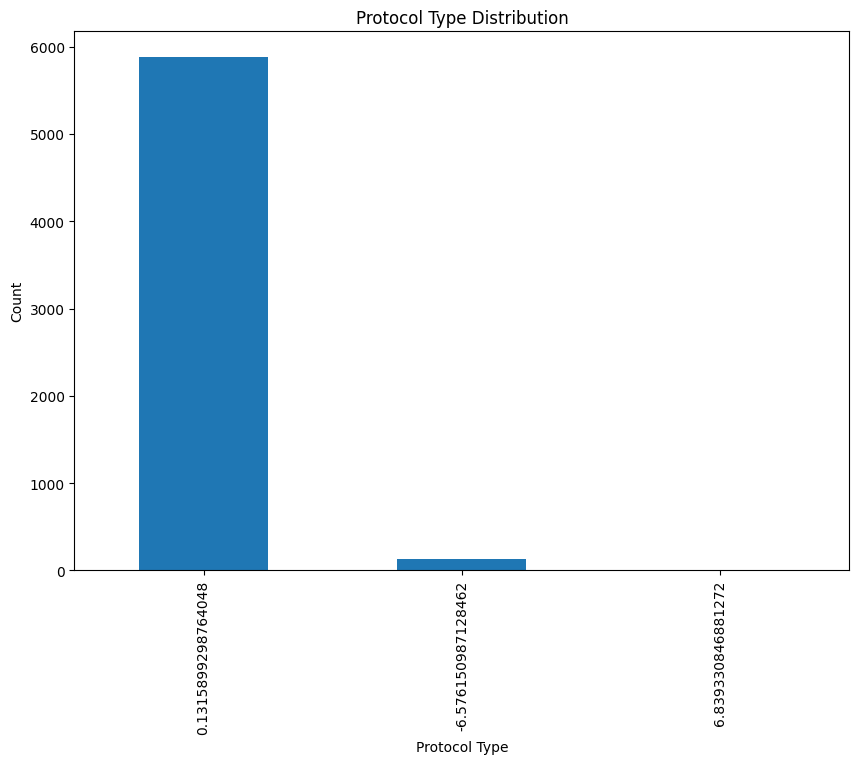

In [533]:
plt.rcParams["figure.figsize"] = (10, 7)

full_df["protocol_type"].value_counts().plot(kind="bar")
plt.xlabel("Protocol Type")
plt.ylabel("Count")
plt.title("Protocol Type Distribution")
plt.show()

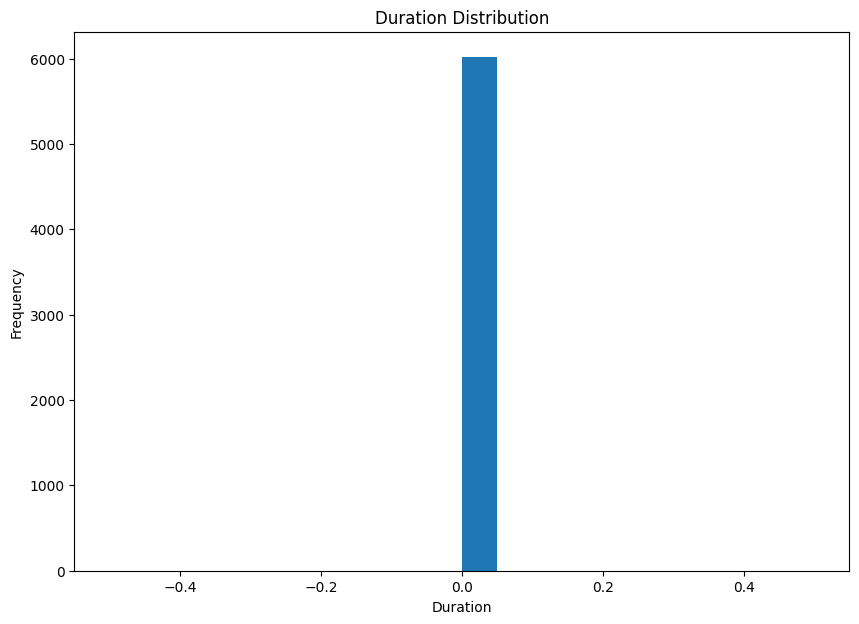

In [534]:
full_df["duration"].plot(kind="hist", bins=20)
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Duration Distribution")
plt.show()

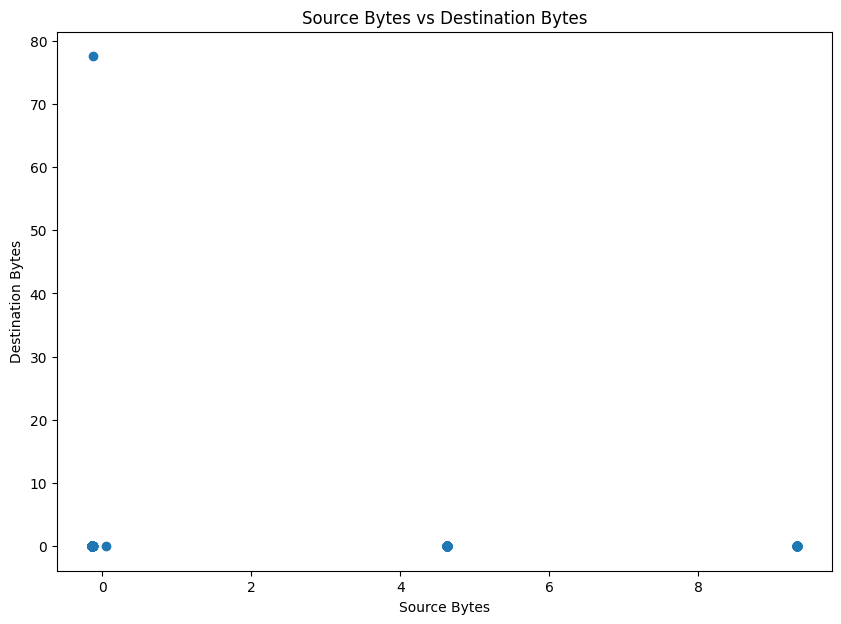

In [535]:
plt.scatter(full_df["src_bytes"], full_df["dst_bytes"])
plt.xlabel("Source Bytes")
plt.ylabel("Destination Bytes")
plt.title("Source Bytes vs Destination Bytes")
plt.show()

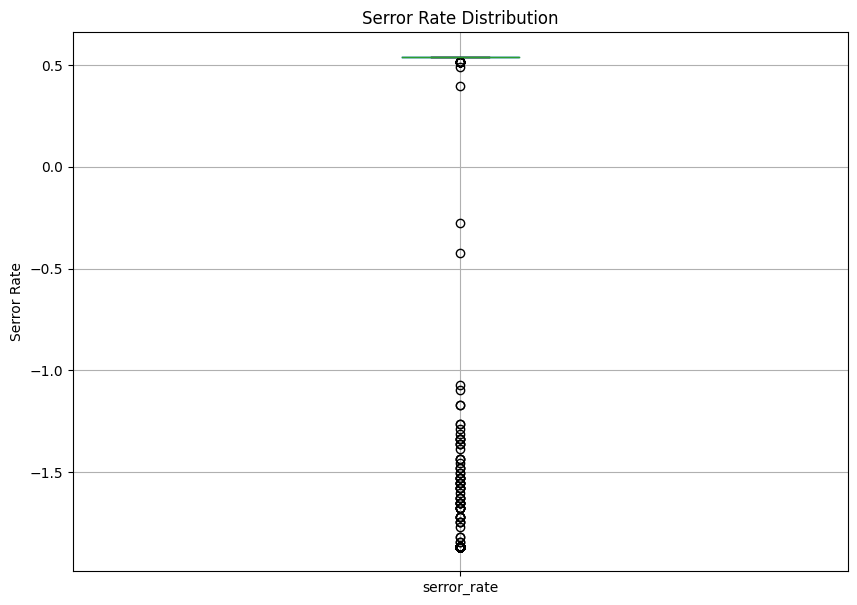

In [536]:
full_df.boxplot(column="serror_rate")
plt.ylabel("Serror Rate")
plt.title("Serror Rate Distribution")
plt.show()

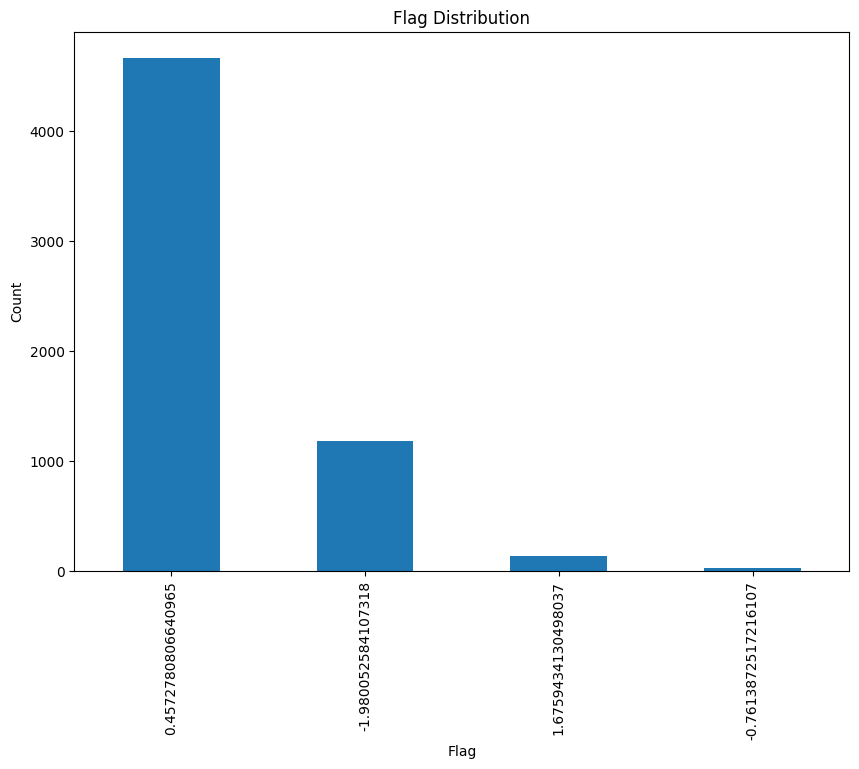

In [537]:
full_df["flag"].value_counts().plot(kind="bar")
plt.xlabel("Flag")
plt.ylabel("Count")
plt.title("Flag Distribution")
plt.show()

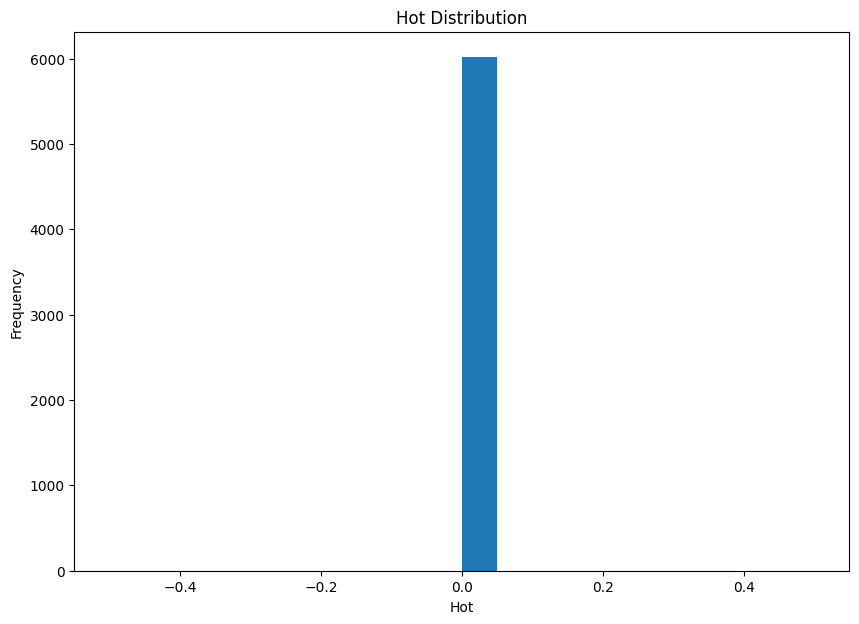

In [538]:
full_df["hot"].plot(kind="hist", bins=20)
plt.xlabel("Hot")
plt.ylabel("Frequency")
plt.title("Hot Distribution")
plt.show()

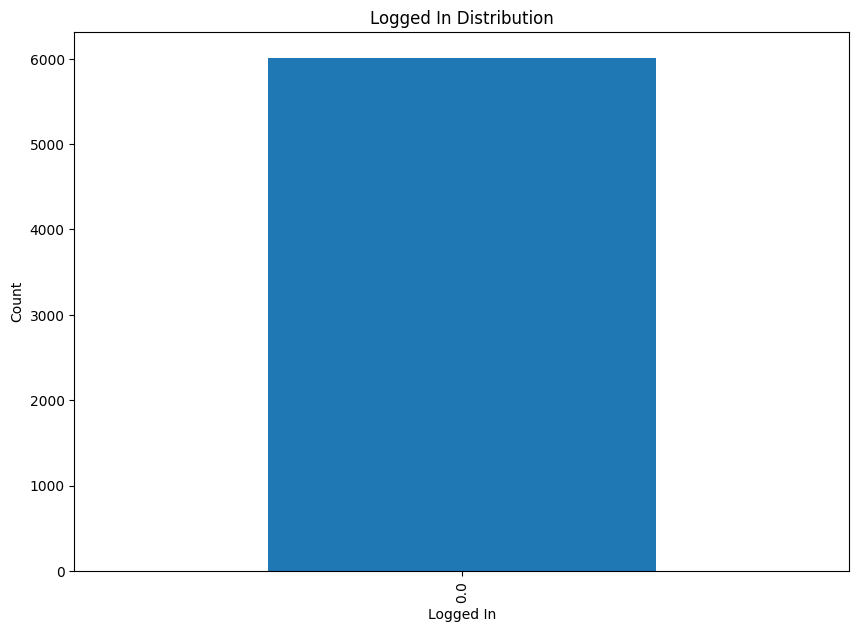

In [539]:
full_df["logged_in"].value_counts().plot(kind="bar")
plt.xlabel("Logged In")
plt.ylabel("Count")
plt.title("Logged In Distribution")
plt.show()

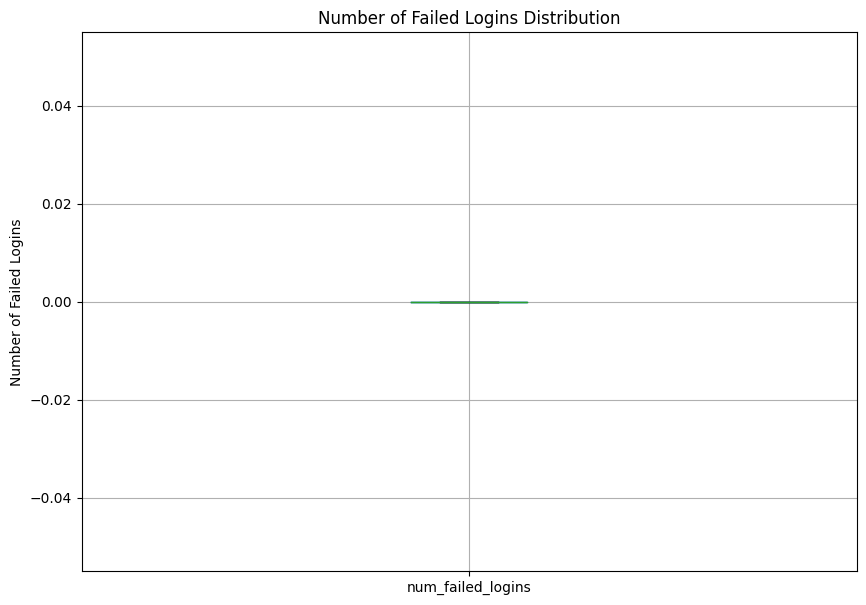

In [540]:
full_df.boxplot(column="num_failed_logins")
plt.ylabel("Number of Failed Logins")
plt.title("Number of Failed Logins Distribution")
plt.show()

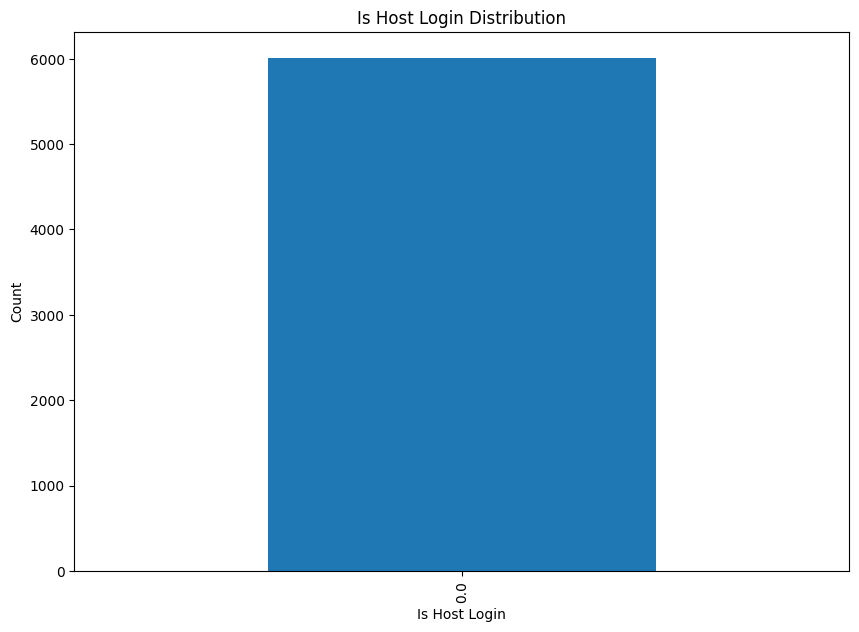

In [541]:
full_df["is_host_login"].value_counts().plot(kind="bar")
plt.xlabel("Is Host Login")
plt.ylabel("Count")
plt.title("Is Host Login Distribution")
plt.show()

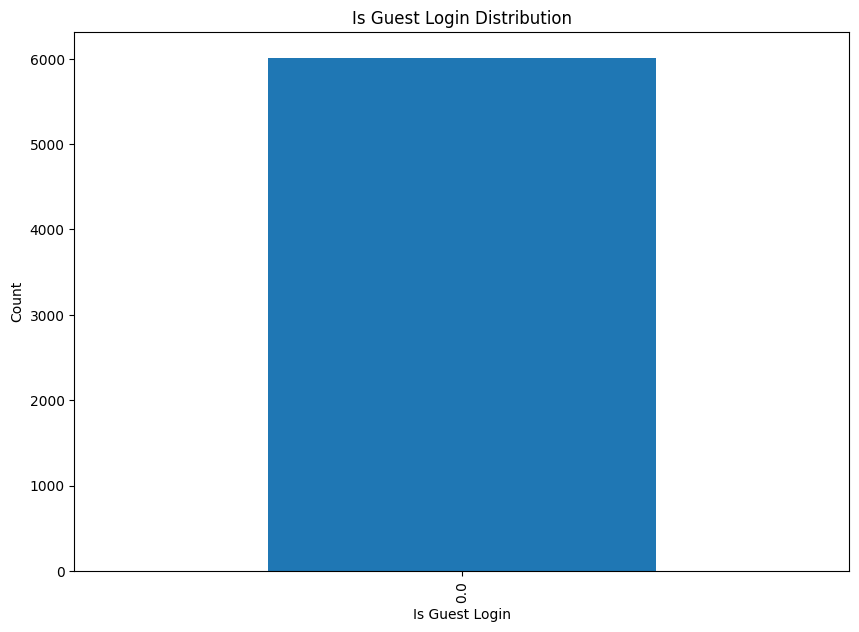

In [542]:
full_df["is_guest_login"].value_counts().plot(kind="bar")
plt.xlabel("Is Guest Login")
plt.ylabel("Count")
plt.title("Is Guest Login Distribution")
plt.show()

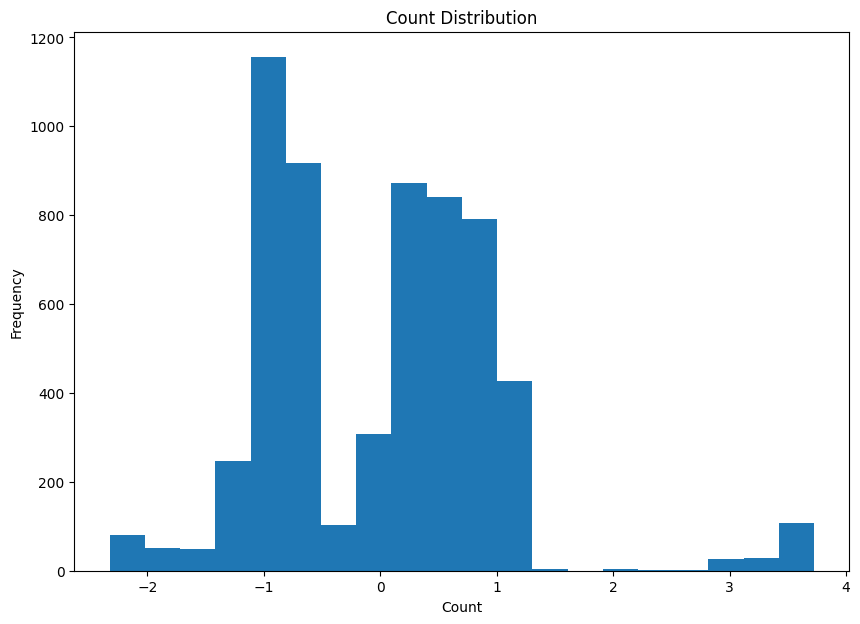

In [543]:
full_df["count"].plot(kind="hist", bins=20)
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.title("Count Distribution")
plt.show()

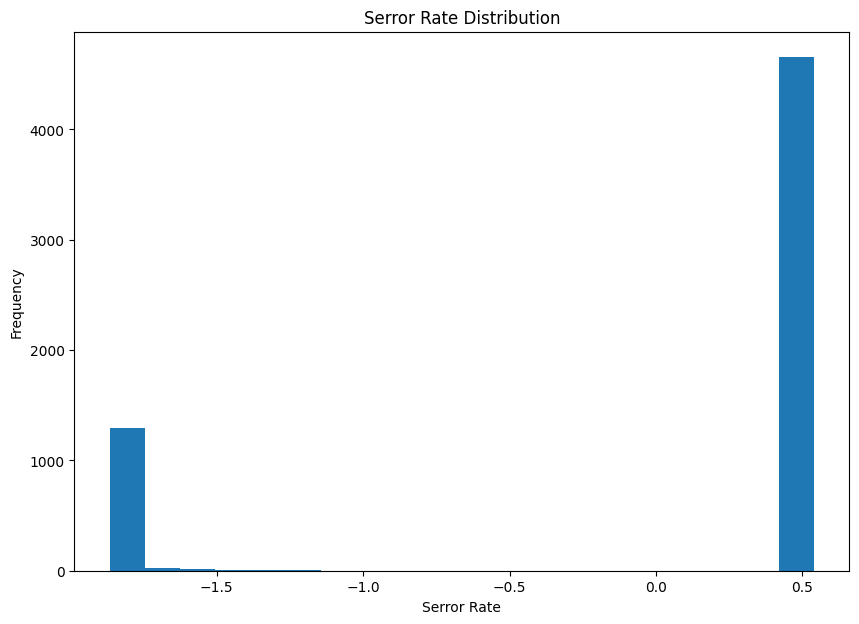

In [544]:
full_df["serror_rate"].plot(kind="hist", bins=20)
plt.xlabel("Serror Rate")
plt.ylabel("Frequency")
plt.title("Serror Rate Distribution")
plt.show()

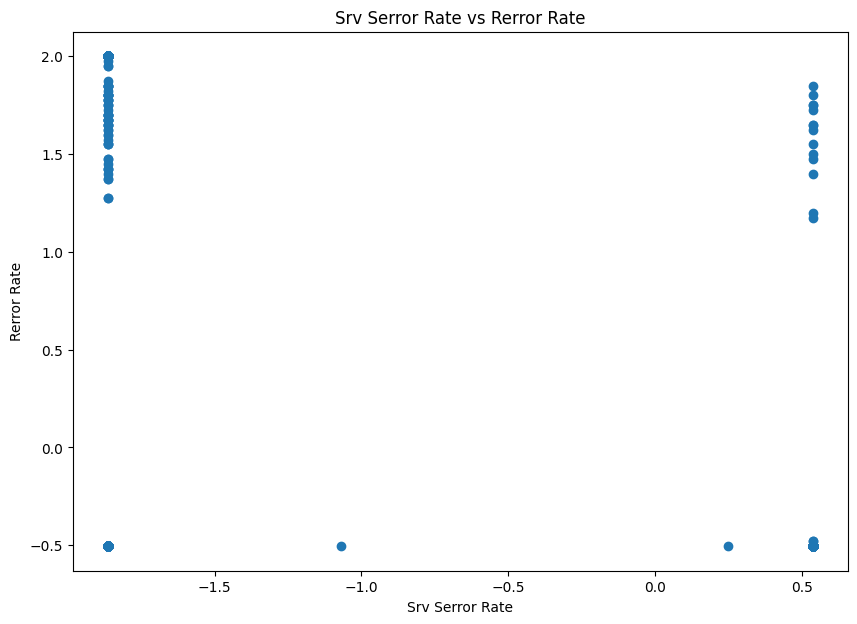

In [545]:
plt.scatter(full_df["srv_serror_rate"], full_df["rerror_rate"])
plt.xlabel("Srv Serror Rate")
plt.ylabel("Rerror Rate")
plt.title("Srv Serror Rate vs Rerror Rate")
plt.show()

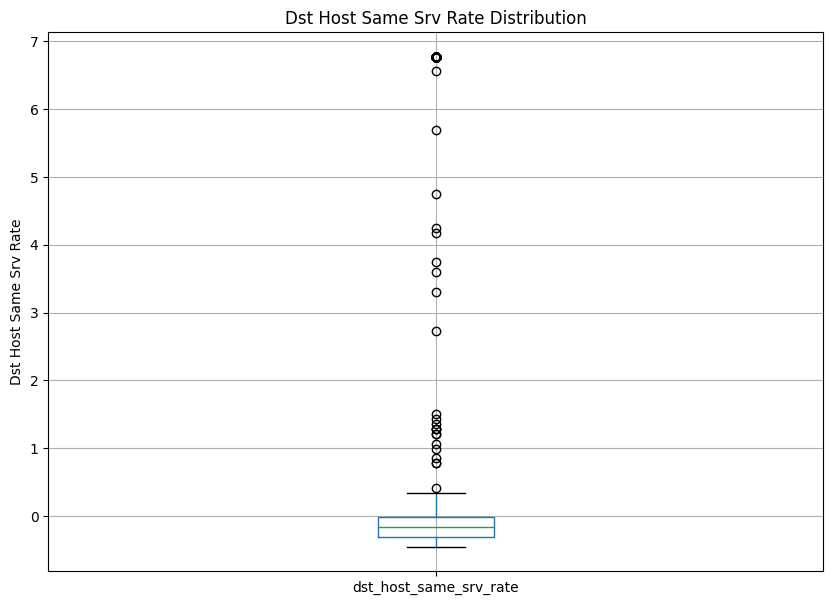

In [546]:
full_df.boxplot(column="dst_host_same_srv_rate")
plt.ylabel("Dst Host Same Srv Rate")
plt.title("Dst Host Same Srv Rate Distribution")
plt.show()

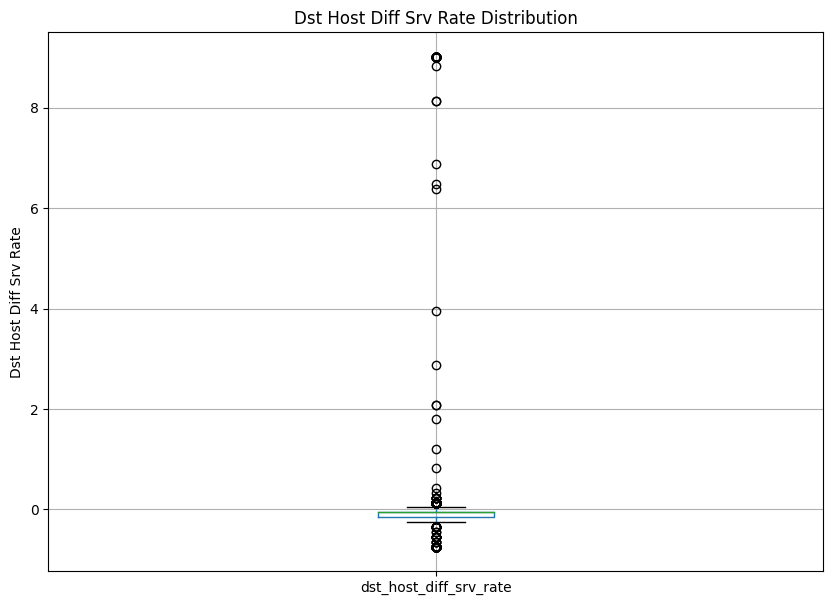

In [547]:
full_df.boxplot(column="dst_host_diff_srv_rate")
plt.ylabel("Dst Host Diff Srv Rate")
plt.title("Dst Host Diff Srv Rate Distribution")
plt.show()

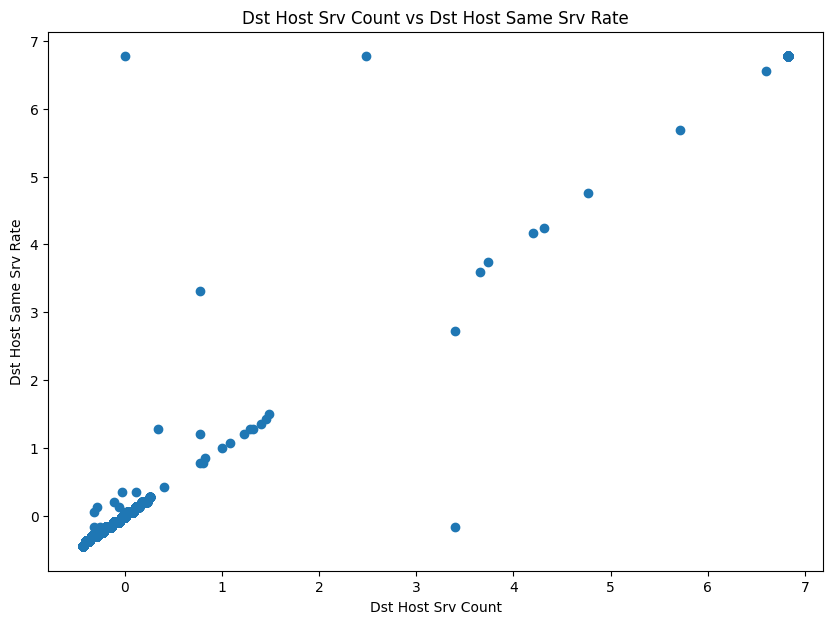

In [548]:
plt.scatter(full_df["dst_host_srv_count"], full_df["dst_host_same_srv_rate"])
plt.xlabel("Dst Host Srv Count")
plt.ylabel("Dst Host Same Srv Rate")
plt.title("Dst Host Srv Count vs Dst Host Same Srv Rate")
plt.show()

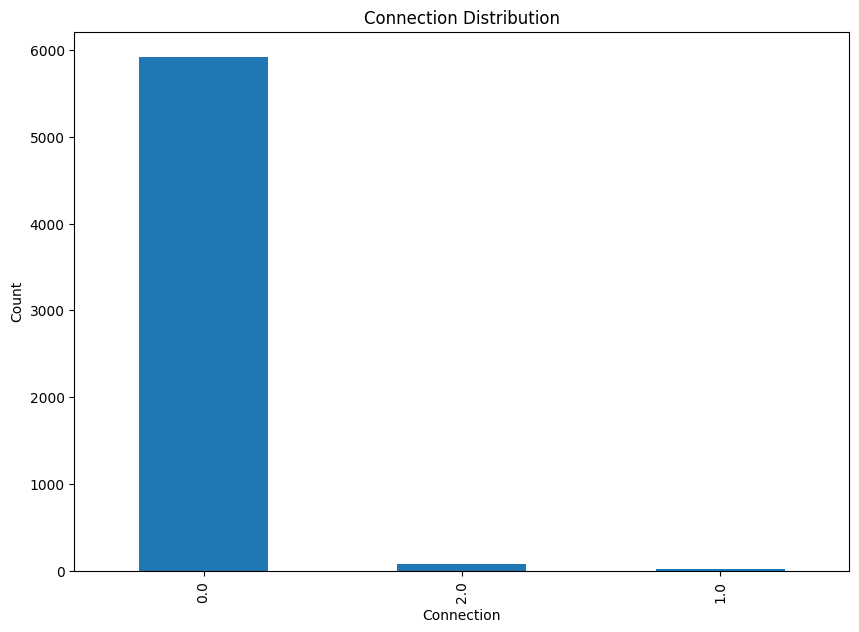

In [549]:
full_df["connection"].value_counts().plot(kind="bar")
plt.xlabel("Connection")
plt.ylabel("Count")
plt.title("Connection Distribution")
plt.show()

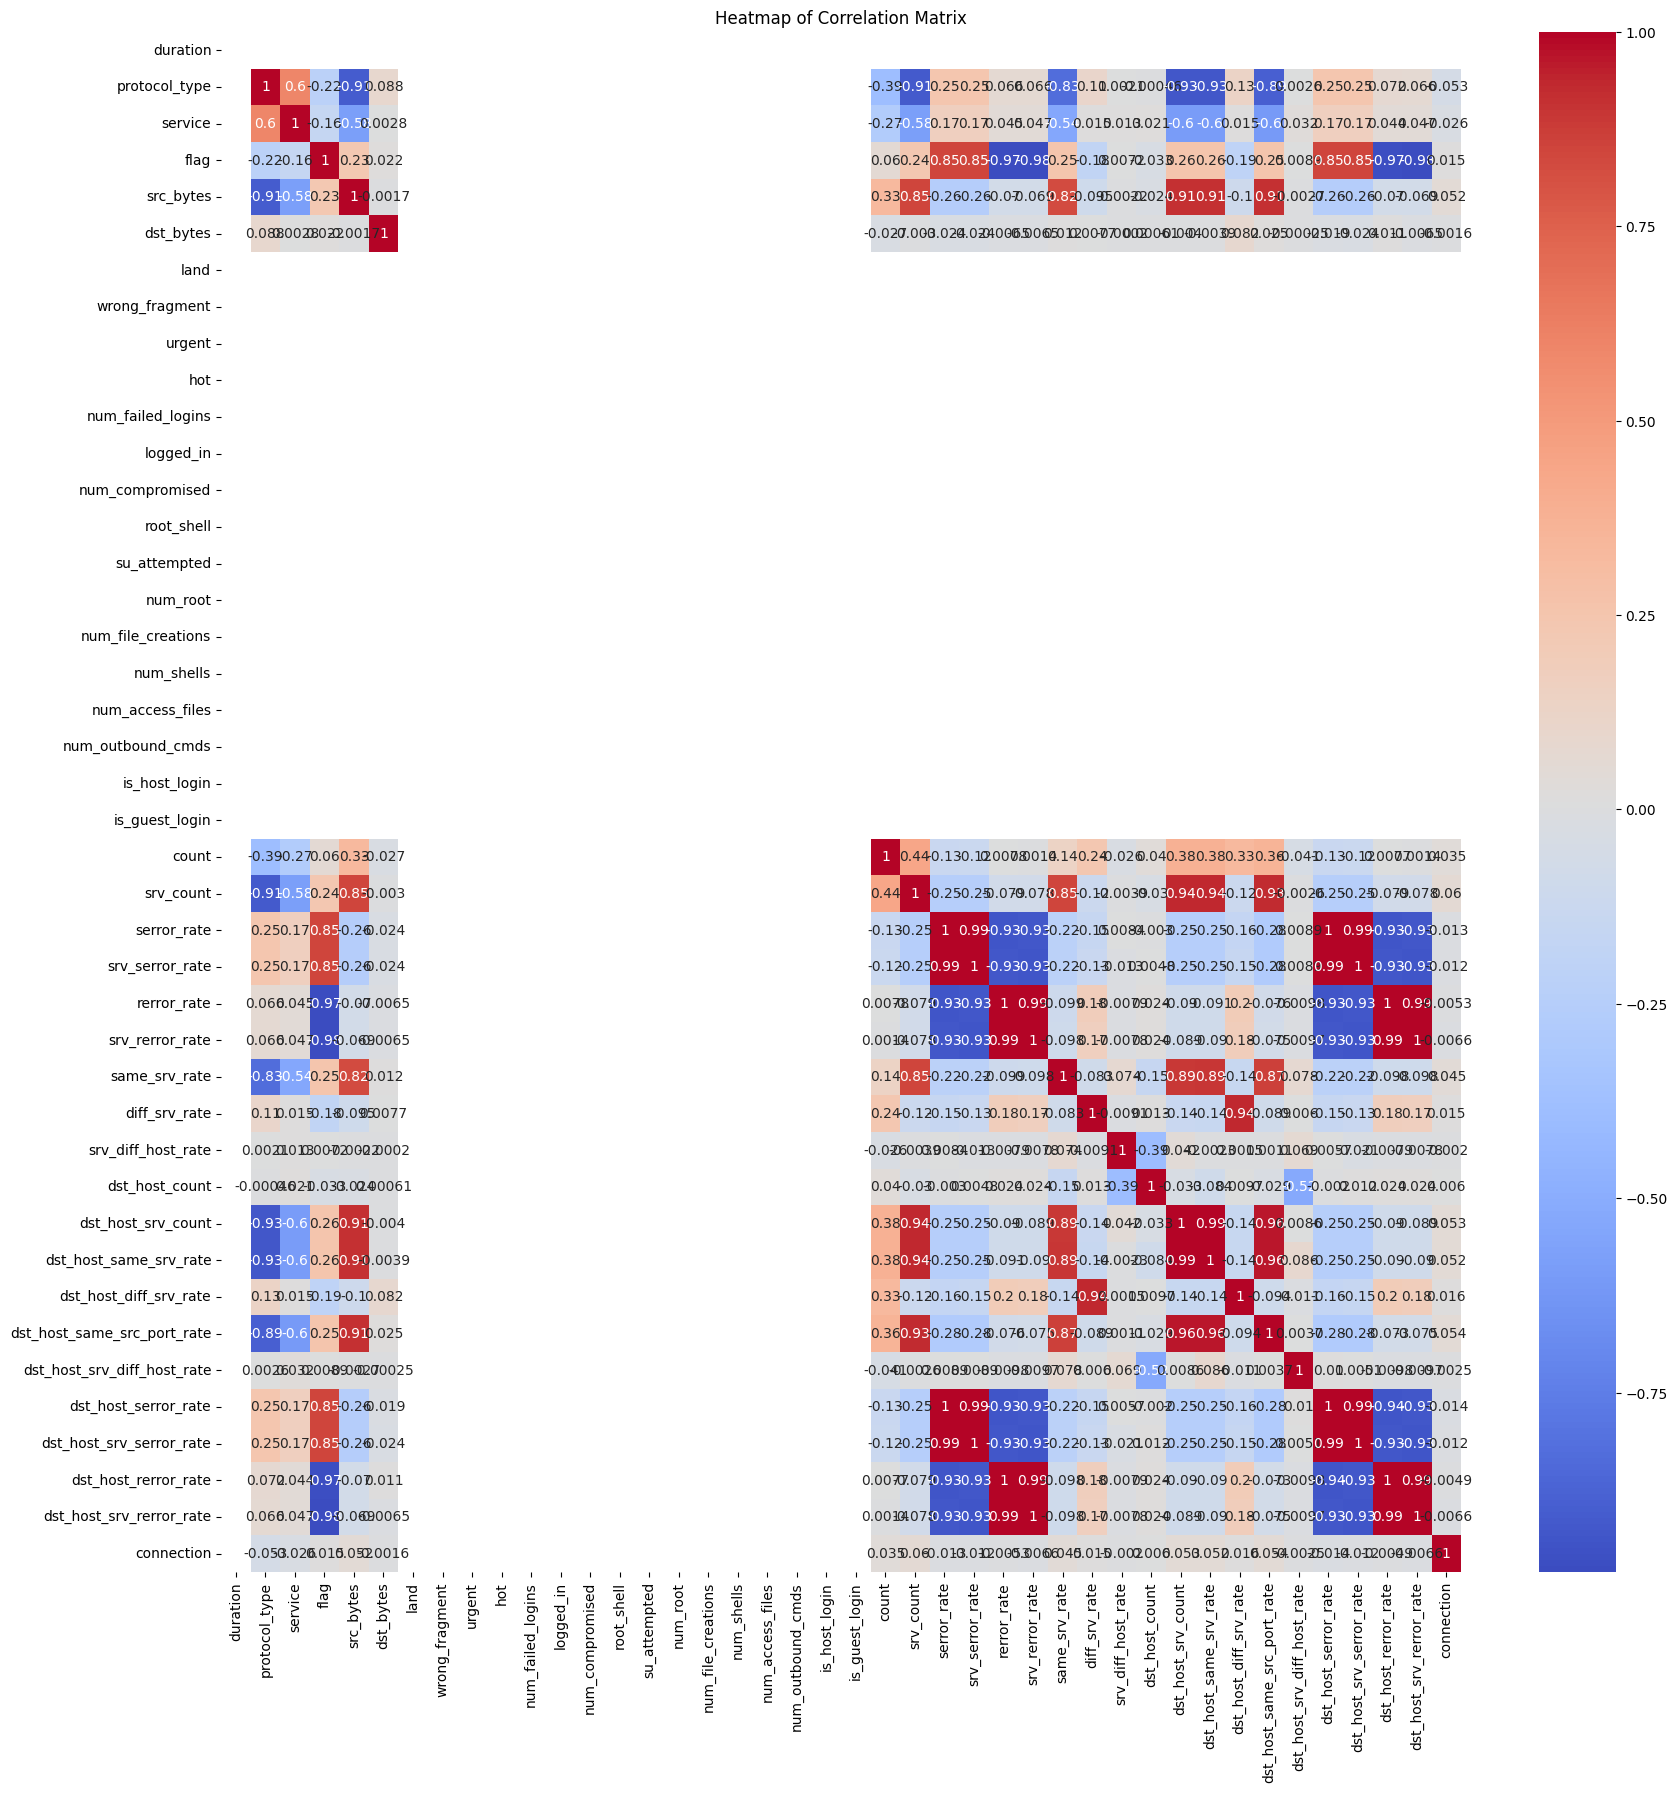

In [550]:
corr = full_df.corr()

plt.figure(figsize=(20, 20))
plt.title("Heatmap of Correlation Matrix")
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

<br>

## Training and Testing the Dataset

In [551]:
target = full_df['connection']

X_train, X_test, y_train, y_test = train_test_split(
    transformed_df, target, test_size=0.3, random_state=8)


# y_train = le.fit_transform(y_train)

# print("Features of the target:")
# target

In [552]:
print("Features X_train:")
X_train

Features X_train:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
1036,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,-0.308838,-0.304103,-0.060788,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558
3187,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,-0.137670,-0.159681,-0.158421,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558
1707,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,-0.223254,-0.231892,-0.158421,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558
2601,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,-0.251782,-0.231892,0.036846,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558
403,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,-0.280310,-0.304103,0.036846,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,0.176138,0.201374,-0.256054,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558
2409,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,0.090554,0.056952,-0.158421,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558
2033,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,0.090554,0.056952,-0.158421,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558
1364,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,-0.251782,-0.231892,-0.060788,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558


In [553]:
print("Features X_test:")
X_test

Features X_test:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
1143,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,0.204666,0.201374,-0.256054,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558
3700,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,-0.251782,-0.231892,-0.060788,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558
5946,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,-0.365894,-0.376313,-0.256054,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558
1915,0.0,0.13159,0.214561,-1.980053,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,-0.337366,-0.304103,-0.060788,-0.150063,-0.019394,-1.866278,-1.862339,1.998592,1.993787
5108,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,-0.337366,-0.304103,0.036846,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,-0.052086,-0.087470,-0.158421,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558
5493,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,0.062026,0.056952,-0.060788,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558
992,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,-0.280310,-0.304103,-0.060788,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558
1944,0.0,0.13159,0.214561,0.457278,-0.138072,-0.012895,0.0,0.0,0.0,0.0,...,0.047278,-0.023558,-0.015259,-0.256054,-0.150063,-0.019394,0.539941,0.537161,-0.505169,-0.501558


In [554]:
print("Features y_train:")
y_train

Features y_train:


1036    0.0
3187    0.0
1707    0.0
2601    0.0
403     0.0
       ... 
2181    0.0
2409    0.0
2033    0.0
1364    0.0
4547    0.0
Name: connection, Length: 4210, dtype: float64

## DecisionTreeClassifier

In [559]:
from sklearn.tree import DecisionTreeClassifier

print("Evaluation for Decision Tree Classifier".center(75, '_'))

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

decision_tree_prediction = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_prediction)
decision_tree_precision = precision_score(
    y_test, decision_tree_prediction, average="weighted")
decision_tree_recall = recall_score(
    y_test, decision_tree_prediction, average="weighted")
decision_tree_f1_score = f1_score(
    y_test, decision_tree_prediction, average="weighted")

print("Prediciton:    ", decision_tree_prediction)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(decision_tree_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(decision_tree_precision * 100)}%")
print("Recall:" + "\t\t" f"{(decision_tree_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(decision_tree_f1_score * 100)}%")
print('_' * 75)


__________________Evaluation for Decision Tree Classifier__________________
Prediciton:     [0. 0. 0. ... 0. 0. 0.]
___________________________________________________________________________
Accuracy:	96.01108033240997%
Precision:	96.80701533486197%
Recall:		96.01108033240997%
F1-Score:	96.4046239262291%
___________________________________________________________________________


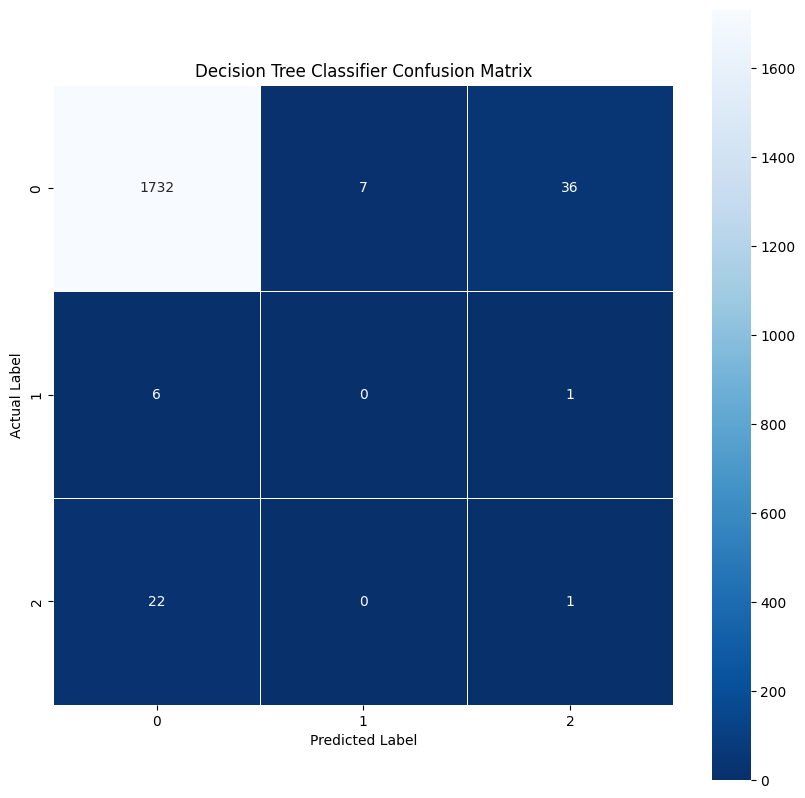

In [563]:
# plot the confusion matrix
cm = confusion_matrix(y_test, decision_tree_prediction)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Decision Tree Classifier Confusion Matrix")
plt.show()

In [564]:
print("Classification Report For Decision Tree Classifier - 'Labels Test' & 'Prediction':")
print('-' * 97)
print(classification_report(y_test, decision_tree_prediction))

Classification Report For Decision Tree Classifier - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1775
         1.0       0.00      0.00      0.00         7
         2.0       0.03      0.04      0.03        23

    accuracy                           0.96      1805
   macro avg       0.34      0.34      0.34      1805
weighted avg       0.97      0.96      0.96      1805



In [566]:
feature_importance = pd.DataFrame(decision_tree.feature_importances_, index=transformed_df.columns, columns=[
                                  'importance']).sort_values('importance', ascending=False)
print(feature_importance)

                             importance
count                          0.313191
srv_count                      0.177392
same_srv_rate                  0.092786
dst_host_diff_srv_rate         0.091875
dst_host_srv_count             0.089570
dst_host_same_srv_rate         0.076014
service                        0.034267
dst_host_serror_rate           0.027591
dst_host_rerror_rate           0.020484
srv_rerror_rate                0.013585
diff_srv_rate                  0.011733
serror_rate                    0.009616
dst_host_srv_rerror_rate       0.009528
dst_host_srv_serror_rate       0.008789
src_bytes                      0.007146
flag                           0.007146
rerror_rate                    0.007146
srv_serror_rate                0.002144
dst_host_srv_diff_host_rate    0.000000
dst_host_same_src_port_rate    0.000000
dst_host_count                 0.000000
srv_diff_host_rate             0.000000
duration                       0.000000
is_guest_login                 0.000000


<Axes: >

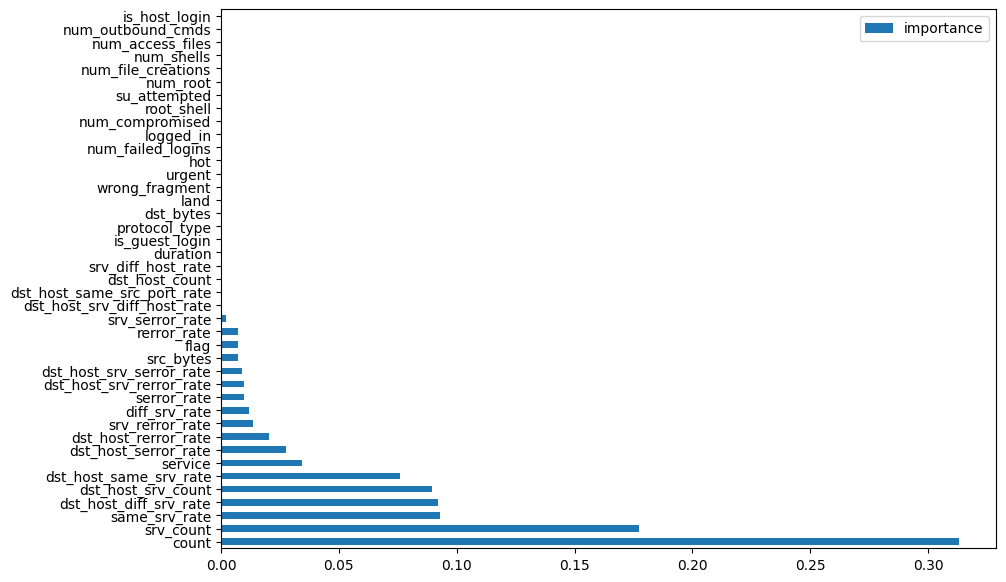

In [567]:
feature_importance.plot(kind='barh')

## SVC

In [568]:
# apply svc
from sklearn.svm import SVC

svc = SVC()

print("Evaluation for Support Vector Classifier".center(75, '_'))
 
svc.fit(X_train, y_train)
 
svc_prediction = svc.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_prediction)
svc_precision = precision_score(y_test, svc_prediction, average="weighted")
svc_recall = recall_score(y_test, svc_prediction, average="weighted")
svc_f1_score = f1_score(y_test, svc_prediction, average="weighted")

print("Prediciton:    ", svc_prediction)
print('_' * 75)
 
print("Accuracy:" + "\t" + f"{(svc_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(svc_precision * 100)}%")
print("Recall:" + "\t\t" f"{(svc_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(svc_f1_score * 100)}%")
print('_' * 75)

__________________Evaluation for Support Vector Classifier_________________
Prediciton:     [0. 0. 0. ... 0. 0. 0.]
___________________________________________________________________________
Accuracy:	98.33795013850416%
Precision:	96.70352437442929%
Recall:		98.33795013850416%
F1-Score:	97.51388910382394%
___________________________________________________________________________


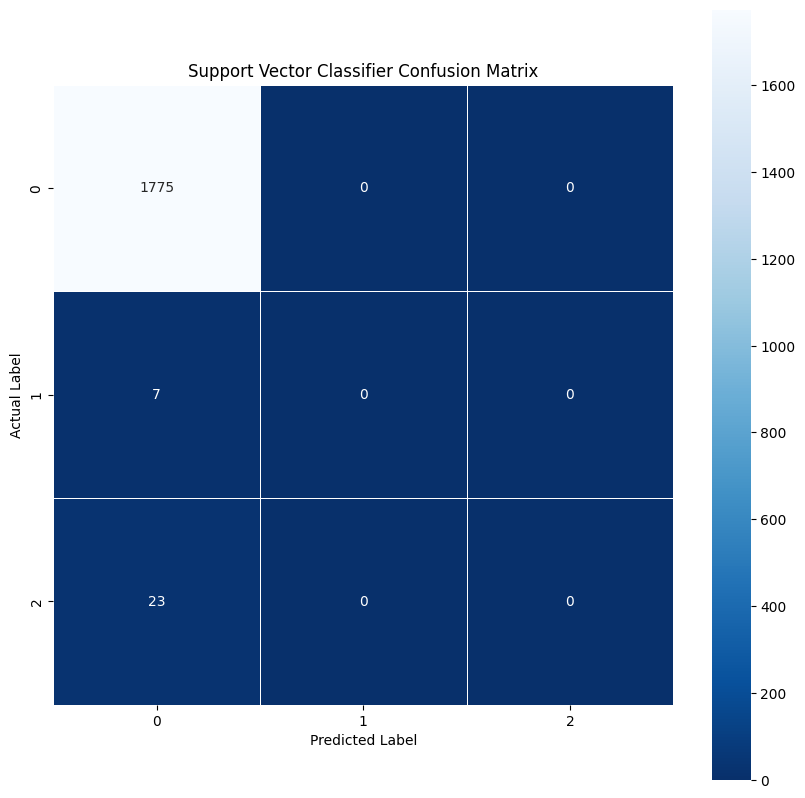

In [569]:
# plot the confusion matrix
cm = confusion_matrix(y_test, svc_prediction)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Support Vector Classifier Confusion Matrix")
plt.show()

In [570]:
print("Classification Report For Decision Tree Classifier - 'Labels Test' & 'Prediction':")
print('-' * 97)
print(classification_report(y_test, decision_tree_prediction))

Classification Report For Decision Tree Classifier - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1775
         1.0       0.00      0.00      0.00         7
         2.0       0.03      0.04      0.03        23

    accuracy                           0.96      1805
   macro avg       0.34      0.34      0.34      1805
weighted avg       0.97      0.96      0.96      1805



## KNeighborsClassifier

In [571]:
print("Evaluation for K-Nearest Neighbors".center(75, '_'))

k_nearest_neighbors = KNeighborsClassifier(n_neighbors=5)
k_nearest_neighbors.fit(X_train, y_train)

k_nearest_neighbors_prediction = k_nearest_neighbors.predict(X_test)
k_nearest_neighbors_accuracy = accuracy_score(
    y_test, k_nearest_neighbors_prediction)
k_nearest_neighbors_precision = precision_score(
    y_test, k_nearest_neighbors_prediction, average="weighted")
k_nearest_neighbors_recall = recall_score(
    y_test, k_nearest_neighbors_prediction, average="weighted")
k_nearest_neighbors_f1_score = f1_score(
    y_test, k_nearest_neighbors_prediction, average="weighted")

print("Prediciton:    ", k_nearest_neighbors_prediction)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(k_nearest_neighbors_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(k_nearest_neighbors_precision * 100)}%")
print("Recall:" + "\t\t" f"{(k_nearest_neighbors_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(k_nearest_neighbors_f1_score * 100)}%")
print('_' * 75)


_____________________Evaluation for K-Nearest Neighbors____________________
Prediciton:     [0. 0. 0. ... 0. 0. 0.]
___________________________________________________________________________
Accuracy:	98.33795013850416%
Precision:	96.70352437442929%
Recall:		98.33795013850416%
F1-Score:	97.51388910382394%
___________________________________________________________________________


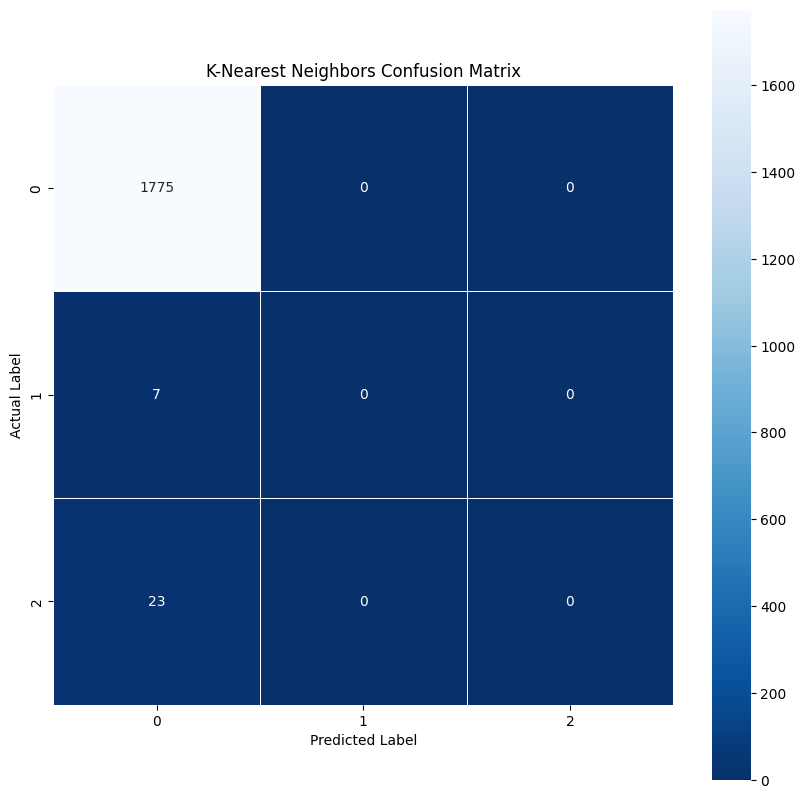

In [572]:
# plot the confusion matrix
cm = confusion_matrix(y_test, k_nearest_neighbors_prediction)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()

In [573]:
print("Classification Report For K-Nearest Neighbors - 'Labels Test' & 'Prediction':")
print('-' * 97)
print(classification_report(y_test, k_nearest_neighbors_prediction))

Classification Report For K-Nearest Neighbors - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1775
         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00        23

    accuracy                           0.98      1805
   macro avg       0.33      0.33      0.33      1805
weighted avg       0.97      0.98      0.98      1805



## AdaBoostClassifier

In [574]:
print("Evaluation for Ada Boost".center(75, '_'))

ada_boast = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_boast.fit(X_train, y_train)

ada_boost_prediction = ada_boast.predict(X_test)
ada_boost_accuracy = accuracy_score(y_test, ada_boost_prediction)
ada_boost_precision = precision_score(
    y_test, ada_boost_prediction, average="weighted")
ada_boost_recall = recall_score(
    y_test, ada_boost_prediction, average="weighted")
ada_boost_f1_score = f1_score(y_test, ada_boost_prediction, average="weighted")

print("Prediciton:    ", ada_boost_prediction)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(ada_boost_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(ada_boost_precision * 100)}%")
print("Recall:" + "\t\t" f"{(ada_boost_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(ada_boost_f1_score * 100)}%")
print('_' * 75)

__________________________Evaluation for Ada Boost_________________________
Prediciton:     [0. 0. 0. ... 0. 0. 0.]
___________________________________________________________________________
Accuracy:	96.34349030470915%
Precision:	96.67026302479294%
Recall:		96.34349030470915%
F1-Score:	96.50660005127467%
___________________________________________________________________________


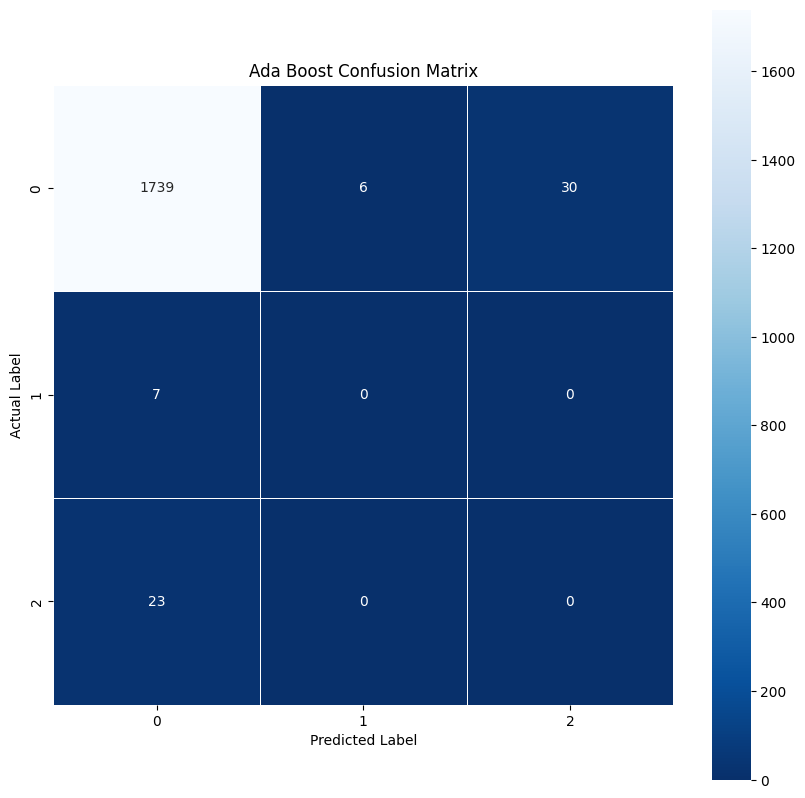

In [575]:
# plot the confusion matrix
cm = confusion_matrix(y_test, ada_boost_prediction)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Ada Boost Confusion Matrix")
plt.show()

In [576]:
print("Classification Report For Ada Boast - 'Labels Test' & 'Prediction':")
print('-' * 97)
print(classification_report(y_test, ada_boost_prediction))

Classification Report For Ada Boast - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1775
         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00        23

    accuracy                           0.96      1805
   macro avg       0.33      0.33      0.33      1805
weighted avg       0.97      0.96      0.97      1805



## GradientBoostingClassifier

In [577]:
print("Evaluation for Gradient Boosting".center(75, '_'))

gradient_boosting = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gradient_boosting.fit(X_train, y_train)

gradient_boosting_prediction = gradient_boosting.predict(X_test)
gradient_boosting_accuracy = accuracy_score(
    y_test, gradient_boosting_prediction)
gradient_boosting_precision = precision_score(
    y_test, gradient_boosting_prediction, average="weighted")
gradient_boosting_recall = recall_score(
    y_test, gradient_boosting_prediction, average="weighted")
gradient_boosting_f1_score = f1_score(
    y_test, gradient_boosting_prediction, average="weighted")

print("Prediciton:    ", gradient_boosting_prediction)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(gradient_boosting_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(gradient_boosting_precision * 100)}%")
print("Recall:" + "\t\t" f"{(gradient_boosting_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(gradient_boosting_f1_score * 100)}%")
print('_' * 75)

______________________Evaluation for Gradient Boosting_____________________
Prediciton:     [0. 0. 0. ... 0. 0. 0.]
___________________________________________________________________________
Accuracy:	98.00554016620498%
Precision:	96.69807326015221%
Recall:		98.00554016620498%
F1-Score:	97.34741678512246%
___________________________________________________________________________


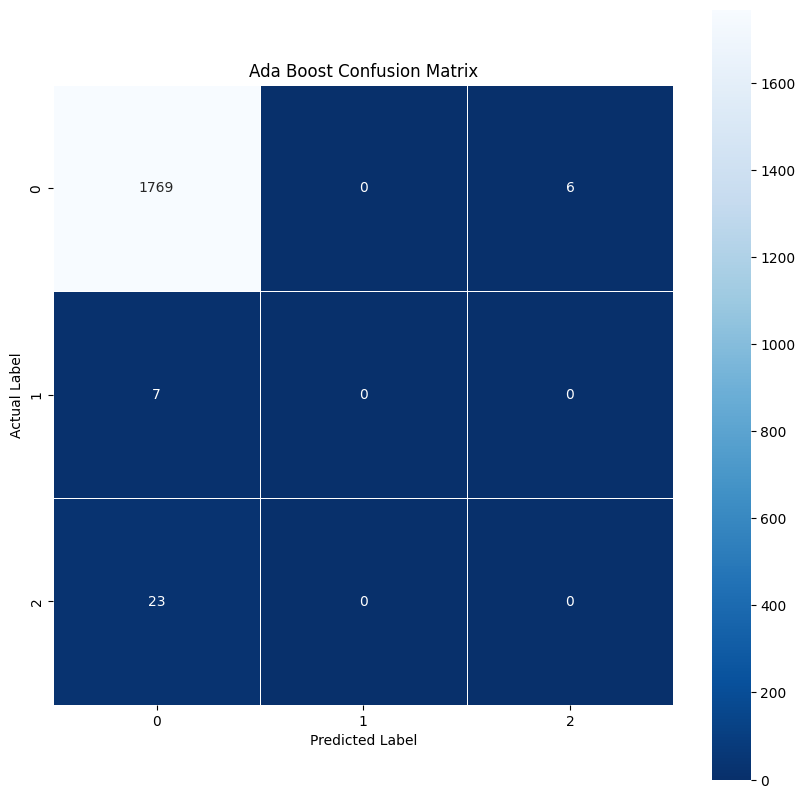

In [578]:
# plot the confusion matrix
cm = confusion_matrix(y_test,  gradient_boosting_prediction)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Ada Boost Confusion Matrix")
plt.show()

In [579]:
print("Classification Report For Gradient Boosting - 'Labels Test' & 'Prediction':")
print('-' * 97)
print(classification_report(y_test, gradient_boosting_prediction))

Classification Report For Gradient Boosting - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1775
         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00        23

    accuracy                           0.98      1805
   macro avg       0.33      0.33      0.33      1805
weighted avg       0.97      0.98      0.97      1805



## HistGradientBoostingClassifier

In [580]:
print("Evaluation for Hist Gradient Boosting".center(75, '_'))

hist_gradient_boosting = HistGradientBoostingClassifier(
    loss='auto', learning_rate=0.1, max_iter=100, max_leaf_nodes=31, random_state=0)
hist_gradient_boosting.fit(X_train, y_train)

hist_gradient_boosting_prediction = hist_gradient_boosting.predict(X_test)
hist_gradient_boosting_accuracy = accuracy_score(
    y_test, hist_gradient_boosting_prediction)
hist_gradient_boosting_precision = precision_score(
    y_test, hist_gradient_boosting_prediction, average="weighted")
hist_gradient_boosting_recall = recall_score(
    y_test, hist_gradient_boosting_prediction, average="weighted")
hist_gradient_boosting_f1_score = f1_score(
    y_test, hist_gradient_boosting_prediction, average="weighted")

print("Prediciton:    ", hist_gradient_boosting_prediction)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(hist_gradient_boosting_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(hist_gradient_boosting_precision * 100)}%")
print("Recall:" + "\t\t" f"{(hist_gradient_boosting_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(hist_gradient_boosting_f1_score * 100)}%")
print('_' * 75)

___________________Evaluation for Hist Gradient Boosting___________________
Prediciton:     [0. 0. 0. ... 0. 0. 0.]
___________________________________________________________________________
Accuracy:	97.89473684210527%
Precision:	96.69624813285299%
Recall:		97.89473684210527%
F1-Score:	97.29180173277537%
___________________________________________________________________________


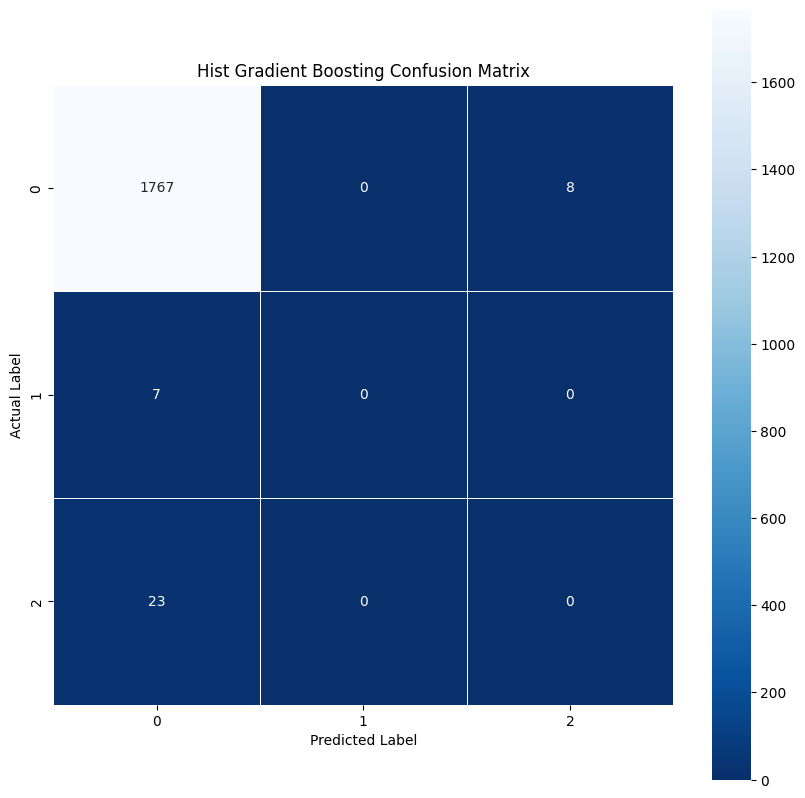

In [587]:
# plot the confusion matrix
cm = confusion_matrix(y_test, hist_gradient_boosting_prediction)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Hist Gradient Boosting Confusion Matrix")
plt.show()

In [582]:
print("Classification Report For Hist Gradient Boosting - 'Labels Test' & 'Prediction':")
print('-' * 97)
print(classification_report(y_test, hist_gradient_boosting_prediction))

Classification Report For Hist Gradient Boosting - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1775
         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00        23

    accuracy                           0.98      1805
   macro avg       0.33      0.33      0.33      1805
weighted avg       0.97      0.98      0.97      1805



## XGBClassifier

In [583]:
print("Evaluation for XGBoost".center(75, '_'))

xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

xgboost_prediction = xgboost.predict(X_test)
xgboost_accuracy = accuracy_score(y_test, xgboost_prediction)
xgboost_precision = precision_score(
    y_test, xgboost_prediction, average="weighted")
xgboost_recall = recall_score(y_test, xgboost_prediction, average="weighted")
xgboost_f1_score = f1_score(y_test, xgboost_prediction, average="weighted")


print("Prediciton:    ", xgboost_prediction)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(xgboost_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(xgboost_precision * 100)}%")
print("Recall:" + "\t\t" f"{(xgboost_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(xgboost_f1_score * 100)}%")


___________________________Evaluation for XGBoost__________________________
Prediciton:     [0 0 0 ... 0 0 0]
___________________________________________________________________________
Accuracy:	98.17174515235457%
Precision:	96.70080335484427%
Recall:		98.17174515235457%
F1-Score:	97.43072275394428%


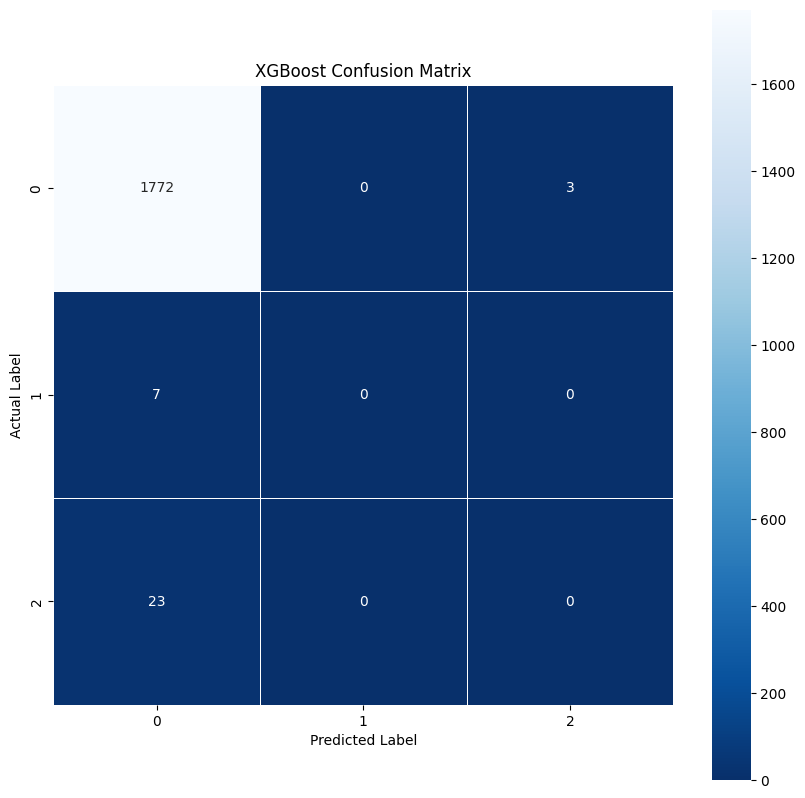

In [588]:
# plot the confusion matrix
cm = confusion_matrix(y_test, xgboost_prediction)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("XGBoost Confusion Matrix")
plt.show()

In [586]:
print("Classification Report For XGBoost - 'Labels Test' & 'Prediction':")
print('-' * 97)
print(classification_report(y_test, xgboost_prediction))

Classification Report For XGBoost - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1775
         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00        23

    accuracy                           0.98      1805
   macro avg       0.33      0.33      0.33      1805
weighted avg       0.97      0.98      0.97      1805



In [591]:
print("Evaluation for Random Forest Classifier".center(75, '_'))

random_forest_classifier = RandomForestClassifier(
    n_estimators=100, random_state=0)
random_forest_classifier.fit(X_train, y_train)

random_forest_classifier_prediction = random_forest_classifier.predict(X_test)
random_forest_classifier_accuracy = accuracy_score(
    y_test, random_forest_classifier_prediction)
random_forest_classifier_precision = precision_score(y_test, random_forest_classifier_prediction, average="weighted")
random_forest_classifier_recall = recall_score(
    y_test, random_forest_classifier_prediction, average="weighted")
random_forest_classifier_f1_score = f1_score(
    y_test, random_forest_classifier_prediction, average="weighted")

print("Prediciton:    ", random_forest_classifier_prediction)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(random_forest_classifier_accuracy * 100)}%")
print("Precision:" + "\t" + f"{(random_forest_classifier_precision * 100)}%")
print("Recall:" + "\t\t" f"{(random_forest_classifier_recall * 100)}%")
print("F1-Score:" + "\t" + f"{(random_forest_classifier_f1_score * 100)}%")
print('_' * 75)


__________________Evaluation for Random Forest Classifier__________________
Prediciton:     [0. 0. 0. ... 0. 0. 0.]
___________________________________________________________________________
Accuracy:	98.06094182825484%
Precision:	96.69898430286241%
Recall:		98.06094182825484%
F1-Score:	97.375200976309%
___________________________________________________________________________


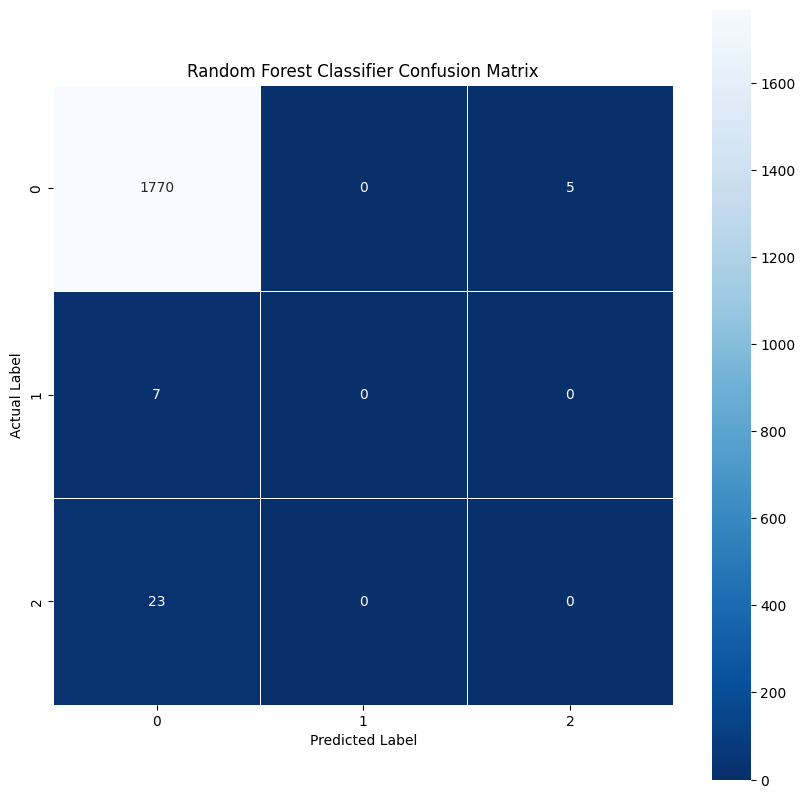

In [592]:
# plot the confusion matrix
cm = confusion_matrix(y_test, random_forest_classifier_prediction)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()

In [593]:
print("Classification Report For Random Forest Classifier - 'Labels Test' & 'Prediction':")
print('-' * 97)
print(classification_report(y_test, random_forest_classifier_prediction))

Classification Report For Random Forest Classifier - 'Labels Test' & 'Prediction':
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1775
         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00        23

    accuracy                           0.98      1805
   macro avg       0.33      0.33      0.33      1805
weighted avg       0.97      0.98      0.97      1805



In [594]:
feature_importance = pd.Series(
    random_forest_classifier.feature_importances_, index=transformed_df.columns)
feature_importance

duration                       0.000000e+00
protocol_type                  2.672586e-04
service                        3.796708e-02
flag                           1.349287e-03
src_bytes                      4.000626e-03
dst_bytes                      4.900826e-08
land                           0.000000e+00
wrong_fragment                 0.000000e+00
urgent                         0.000000e+00
hot                            0.000000e+00
num_failed_logins              0.000000e+00
logged_in                      0.000000e+00
num_compromised                0.000000e+00
root_shell                     0.000000e+00
su_attempted                   0.000000e+00
num_root                       0.000000e+00
num_file_creations             0.000000e+00
num_shells                     0.000000e+00
num_access_files               0.000000e+00
num_outbound_cmds              0.000000e+00
is_host_login                  0.000000e+00
is_guest_login                 0.000000e+00
count                          4

<Axes: >

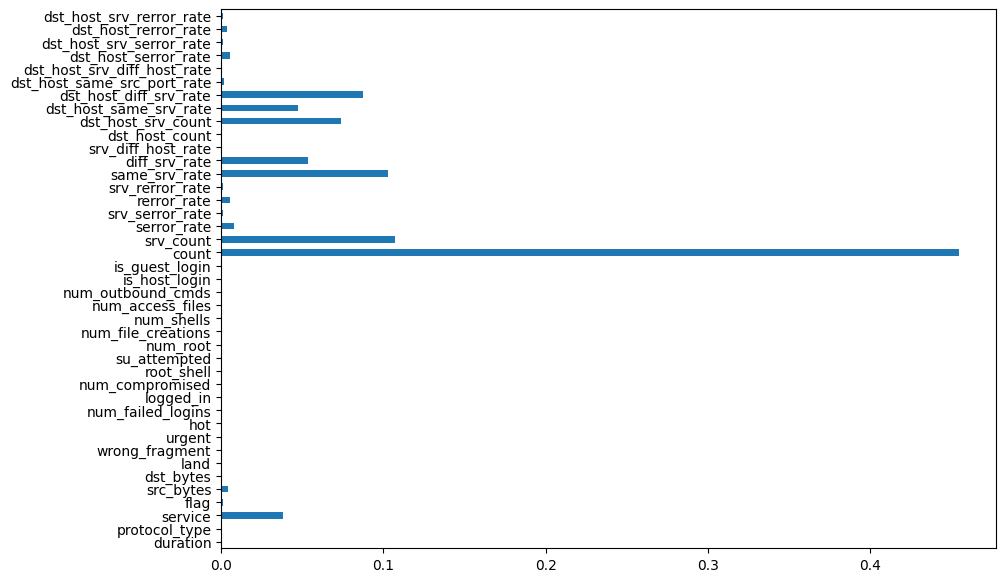

In [595]:
feature_importance.plot(kind='barh')

# The commented code is extra, So i dont know if i should remove this or not

In [ ]:
"""
svc = SVC()
xgb = XGBClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
hgb = HistGradientBoostingClassifier()
"""

"""
XGB Classifier
AdaBoostClassifier
K-Neighbors Classifier
Multinomial Naive Bayes
Decision Tree Classifier
Gradient Boosting Classifier
C-Support Vector Classification
Histogram-based Gradient Boosting Classification Tree
"""

In [ ]:
# -------------------------- GridSearchCV: C-Support Vector Classification (SVC) --------------------------- #
# svc = SVC()
# svc_param_grid = [
#     {
#         "C": np.logspace(start=-2, stop=3, num=7), 
#         "kernel": ["linear", "poly", "rbf", "sigmoid"], 
#         # "degree": np.linspace(start=0, stop=20, num=10, dtype=int), 
#         # "gamma": np.logspace(start=0, stop=3, num=11), 
#         "shrinking": [True, False], 
#         "tol": np.logspace(start=-2, stop=3, num=7), 
#         # "max_iter": np.linspace(start=1000, stop=3000, num=11, dtype=int), 
#         "decision_function_shape": ["ovo", "ovr"]
#     }
# ]

# svc_clf = GridSearchCV(estimator=svc, param_grid=svc_param_grid, cv=3, n_jobs=-1)
# svc_best_clf = svc_clf.fit(X_train, y_train)
# svc_best_model = svc_best_clf.best_estimator_

# print(svc_best_model)

In [560]:
# models = {
#     # "XGB Classifier": XGBClassifier(), 
#     # "AdaBoostClassifier": AdaBoostClassifier(), 
#     # "K-Neighbors Classifier": KNeighborsClassifier(), 
#     # "Multinomial Naive Bayes": MultinomialNB(), 
#     # "Decision Tree Classifier": DecisionTreeClassifier(), 
#     # "Gradient Boosting Classifier": GradientBoostingClassifier(), 
#     "C-Support Vector Classification": SVC(), 
#     # "Histogram-based Gradient Boosting Classification Tree": HistGradientBoostingClassifier()
# }

# model_accuracy_score = []
# model_precision_score = []
# model_recall_score = []
# model_f1_score = []

In [608]:
# for model_name, model in models.items():
#     model.fit(X_train, y_train)

#     model_prediction = model.predict(X_test)
#     model_accuracy = accuracy_score(y_test, model_prediction)
#     model_precision = precision_score(y_test, model_prediction, average="weighted")
#     model_recall = recall_score(y_test, model_prediction, average="weighted")
#     model_f1 = f1_score(y_test, model_prediction, average="weighted")

#     model_accuracy_score.append(int(model_accuracy * 100))
#     model_precision_score.append(int(model_precision * 100))
#     model_recall_score.append(int(model_recall * 100))
#     model_f1_score.append(int(model_f1 * 100))

#     print(f"Evaluation for: {model_name}".center(80, '_') + "\n" + 
#           f"Model Type:       {model}"  + "\n" + 
#           f"Model Prediction: {model_prediction}")

# Deep Learning

## CNN

In [600]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

num_features = len(dataset.columns) - 1
num_classes = len(dataset["connection"].unique())

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3,
          activation='relu', input_shape=(num_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
cnn_loss, cnn_accuracy = model.evaluate(X_test, y_test)

Epoch 1/10


2023-07-13 23:21:14.560113: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


132/132 [==============================] - 5s 18ms/step - loss: 0.3070 - accuracy: 0.9793
Epoch 2/10
132/132 [==============================] - 3s 25ms/step - loss: 0.1000 - accuracy: 0.9827
Epoch 3/10
132/132 [==============================] - 2s 17ms/step - loss: 0.0978 - accuracy: 0.9824
Epoch 4/10
132/132 [==============================] - 2s 11ms/step - loss: 0.0965 - accuracy: 0.9831
Epoch 5/10
132/132 [==============================] - 1s 11ms/step - loss: 0.0978 - accuracy: 0.9831
Epoch 6/10
132/132 [==============================] - 1s 8ms/step - loss: 0.0970 - accuracy: 0.9831
Epoch 7/10
132/132 [==============================] - 1s 8ms/step - loss: 0.0965 - accuracy: 0.9829
Epoch 8/10
132/132 [==============================] - 1s 8ms/step - loss: 0.0961 - accuracy: 0.9831
Epoch 9/10
132/132 [==============================] - 1s 8ms/step - loss: 0.0951 - accuracy: 0.9831
Epoch 10/10
57/57 [==============================] - 1s 10ms/step - loss: 0.1012 - accuracy: 0.9834


In [602]:
print("Prediciton:    ", model)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(cnn_accuracy * 100)}%")
print("Loss:" + "\t\t" + f"{(cnn_loss * 100)}%")

Prediciton:     <keras.engine.sequential.Sequential object at 0x3402bee60>
___________________________________________________________________________
Accuracy:	98.33794832229614%
Loss:		10.12456938624382%


## Auto Encoder

In [603]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the Autoencoder model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(num_features,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_features, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, X_train, epochs=10, batch_size=32)

# Use the trained model for anomaly detection
reconstructed_data = model.predict(X_test)
auto_encoder_loss = tf.keras.losses.mae(reconstructed_data, X_test)
auto_encoder_accuracy = tf.keras.metrics.binary_accuracy(
    reconstructed_data, X_test)

Epoch 1/10
132/132 [==============================] - 3s 12ms/step - loss: 0.2215
Epoch 2/10
132/132 [==============================] - 1s 9ms/step - loss: 0.0892
Epoch 3/10
132/132 [==============================] - 1s 10ms/step - loss: 0.0498
Epoch 4/10
132/132 [==============================] - 1s 10ms/step - loss: 0.0280
Epoch 5/10
132/132 [==============================] - 1s 11ms/step - loss: 0.0472
Epoch 6/10
132/132 [==============================] - 1s 10ms/step - loss: 0.0479
Epoch 7/10
132/132 [==============================] - 2s 14ms/step - loss: 0.0195
Epoch 8/10
132/132 [==============================] - 1s 11ms/step - loss: 0.0082
Epoch 9/10
132/132 [==============================] - 2s 12ms/step - loss: 0.0095
Epoch 10/10
57/57 [==============================] - 0s 6ms/step


In [604]:
print("Prediciton:    ", model)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(auto_encoder_accuracy * 100)}%")
print("Loss:" + "\t\t" + f"{(auto_encoder_loss * 100)}%")

Prediciton:     <keras.engine.sequential.Sequential object at 0x3d2e93370>
___________________________________________________________________________
Accuracy:	[0. 0. 0. ... 0. 0. 0.]%
Loss:		[3.27793626 2.31605692 2.94681351 ... 3.25571181 2.28270864 2.77334215]%


## Gated Recurrent Unit (GRU)

In [605]:
# Apply gru to the dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Define the GRU model
model = Sequential()
model.add(GRU(32, input_shape=(num_features, 1)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
gru_loss, gru_accuracy = model.evaluate(X_test, y_test)

Epoch 1/10
132/132 [==============================] - 6s 25ms/step - loss: 0.8965 - accuracy: 0.9114
Epoch 2/10
132/132 [==============================] - 3s 24ms/step - loss: 0.1156 - accuracy: 0.9831
Epoch 3/10
132/132 [==============================] - 3s 21ms/step - loss: 0.0988 - accuracy: 0.9831
Epoch 4/10
132/132 [==============================] - 2s 17ms/step - loss: 0.0963 - accuracy: 0.9831
Epoch 5/10
132/132 [==============================] - 3s 21ms/step - loss: 0.0942 - accuracy: 0.9831
Epoch 6/10
132/132 [==============================] - 2s 18ms/step - loss: 0.0944 - accuracy: 0.9831
Epoch 7/10
132/132 [==============================] - 3s 20ms/step - loss: 0.0940 - accuracy: 0.9831
Epoch 8/10
132/132 [==============================] - 3s 21ms/step - loss: 0.0938 - accuracy: 0.9831
Epoch 9/10
132/132 [==============================] - 2s 19ms/step - loss: 0.0936 - accuracy: 0.9831
Epoch 10/10
57/57 [==============================] - 1s 16ms/step - loss: 0.0934 - accuracy

In [606]:
print("Prediciton:    ", model)
print('_' * 75)

print("Accuracy:" + "\t" + f"{(gru_accuracy * 100)}%")
print("Loss:" + "\t\t" + f"{(gru_loss * 100)}%")

Prediciton:     <keras.engine.sequential.Sequential object at 0x42999a5c0>
___________________________________________________________________________
Accuracy:	98.33794832229614%
Loss:		9.344129264354706%


<br>

## __<center><u>Assessment: Experimentations (using Deep Learning)</u></center>__

<br>
<br>

## __<center><u>Assessment: Report</u></center>__

### __Introduction__

Computer networks are continuously at risk of different security risks and attacks in today's linked world. In order to protect the integrity, confidentiality, and availability of network resources, intrusion detection systems (IDS) are an essential defense mechanism. Traditional IDS methods frequently rely on hand-written rules and signatures, which can take a lot of time to create and maintain. Machine learning (ML) techniques have been a viable tool for creating IDSs that are more efficient and adaptable in recent years.

Utilizing computational techniques, machine learning uses vast amounts of network data to automatically identify patterns and abnormalities. ML algorithms can detect malicious activity, unauthorized access attempts, and unusual behaviors that can point to an intrusion by examining network traffic. The real-time detection and classification of these patterns by ML algorithms has made them a desirable choice for increasing computer network security.

This report's main objective is to assess how well three deep learning models and six machine learning algorithms perform when used to create an IDS. RandomForestClassifier, DecisionTreeClassifier, AdaBoostClassifier, XGBClassifier, GradientBoostingClassifier, and HistGradientBoostingClassifier are the machine learning methods taken into consideration in this study. Convolutional Neural Network (CNN), autoencoder, and Gated Recurrent Unit (GRU) are further deep learning models. These models and algorithms were chosen for their acceptance, effectiveness, and capacity to handle complicated and high-dimensional data.

The purpose of this study is to evaluate the efficiency of these ML models and algorithms in creating an IDS. The paper also seeks to pinpoint appropriate evaluation indicators, such as precision or recall, for gauging the effectiveness of the IDS. By calculating the percentage of correctly detected assaults among all projected attacks, precision calculates the accuracy of positive predictions. The capacity to recognize actual attacks is measured by recall, which is the percentage of correctly identified attacks among all actual attacks. To reduce false positives (FP) and false negatives (FN) and strike a balance between precise detection and low false alarm rates, IDS must have high precision and recall.

This work aims to provide light on the usefulness of various ML algorithms and models and their potential use in creating IDSs by assessing and contrasting their performance. The research findings can aid network administrators, security experts, and researchers in choosing the best machine learning (ML) methods for detecting intrusions and boosting the security of computer networks.

The following sections of this report will cover the dataset used in the study, a literature review to understand current trends and techniques in developing IDS using ML, a methodology to fill the research gap, and experiments and results to assess the effectiveness of ML algorithms and models. Finally, in order to lead future developments in the field of intrusion detection using machine learning, limitations and future directions for this research will be explored.
